# CLEANING PROCESS

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Loading data

In [2]:
my_path = "Complete with your path"
input_path = my_path + "Data.xlsx"
original = pd.read_excel(input_path, sheet_name=0, header=0, dtype=str)

In [3]:
df = original.copy()

## General exploration

In [4]:
df.head()

,SHIPMENT ID,MASTER LOAD ID,CARRIER,FROM COUNTRY,FROM CITY,FROM PCODE,TO COUNTRY,TO CITY,TO PCODE,COLLECT DATE,DELIVER DATE,INCOTERMS,PIECES,WEIGHT (KG),VOLUME (M3),LDM,CHARGEABLE WEIGHT,DANGEROUS GOODS,IN/OUT/TFR,OEM/AM
0,96874,1065534,CARRIER 005,SWEDEN,OREBRO,70115,POLAND,SZTUM,83140,2018-09-19 00:00:00,2018-09-24 00:00:00,FCA,1,5,0.01,0,5,N,INBOUND,OEM
1,90248,1061427,CARRIER 002,NORWAY,OS,5210,NORWAY,HORDVIK,5108,2018-07-09 00:00:00,2018-07-10 00:00:00,FCA,1,3430,1.134,0,3430,N,INBOUND,OEM
2,85754,1058685,CARRIER 002,NORWAY,LILLESTROM,2004,NORWAY,HORDVIK,5108,2018-05-24 00:00:00,2018-05-25 00:00:00,EXW,2,117,0.51,740,740,N,INBOUND,OEM
3,74527,1051358,CARRIER 002,NORWAY,VINTERBRO,1407,NORWAY,HAREID,6065,2018-02-05 00:00:00,2018-02-06 00:00:00,FCA,1,7,0.02,0,7,NaN,INBOUND,AM
4,88766,1060579,CARRIER 002,NORWAY,LONEVÅG,5282,NETHERLANDS,HELMOND,5704RL,2018-06-25 00:00:00,2018-06-28 00:00:00,EXW,1,121,0.53,740,740,N,INBOUND,OEM


In [5]:
df.tail()

,SHIPMENT ID,MASTER LOAD ID,CARRIER,FROM COUNTRY,FROM CITY,FROM PCODE,TO COUNTRY,TO CITY,TO PCODE,COLLECT DATE,DELIVER DATE,INCOTERMS,PIECES,WEIGHT (KG),VOLUME (M3),LDM,CHARGEABLE WEIGHT,DANGEROUS GOODS,IN/OUT/TFR,OEM/AM
13059,82642,1056711,CARRIER 002,NORWAY,LONEVÅG,5282,NETHERLANDS,HELMOND,5704RL,2018-04-20 00:00:00,2018-04-25 00:00:00,EXW,1,305,0.53,740,740,NaN,INBOUND,OEM
13060,82567,1056657,CARRIER 013,FINLAND,TURKU,20100,NETHERLANDS,HELMOND,5704RL,2018-04-20 00:00:00,2018-04-26 00:00:00,FCA,15,30,1.2,11655,11655,NaN,INBOUND,OEM
13061,82110,1056392,CARRIER 002,NORWAY,TRONDHEIM,7041,NORWAY,HORDVIK,5108,2018-04-17 00:00:00,2018-04-19 00:00:00,FCA,13,130,0.71,0,236.42999999999998,NaN,INBOUND,OEM
13062,92990,1063008,CARRIER 001,SWEDEN,SODERKOPING,61434,SWEDEN,KARLSTAD,68195,2018-08-09 00:00:00,2018-08-15 00:00:00,FCA,1,1,0,85.4,85.4,N,INBOUND,AM
13063,97652,1066018,CARRIER 010,NORWAY,VIGRA,N-6293,NORWAY,SKODJE,6260,2018-09-26 00:00:00,2018-09-28 00:00:00,FCA (FCA INCOTERMS 2000),1,361,1.93,0,642.6899999999999,0,OUTBOUND,OEM


In [6]:
# number of rows and columns
print(f"Total shippments: {df.shape[0]}")
print(f"Total variables: {df.shape[1]}")

Total shippments: 13064
Total variables: 20


In [7]:
# some statistics
df.describe()

,SHIPMENT ID,MASTER LOAD ID,CARRIER,FROM COUNTRY,FROM CITY,FROM PCODE,TO COUNTRY,TO CITY,TO PCODE,COLLECT DATE,DELIVER DATE,INCOTERMS,PIECES,WEIGHT (KG),VOLUME (M3),LDM,CHARGEABLE WEIGHT,DANGEROUS GOODS,IN/OUT/TFR,OEM/AM
count,13064,13064,13064,13064,13063,13058,13064,13054,13061,13064,13064,13064,13064,13064,13064,13064,13064,7051,13064,13064
unique,11714,11710,24,28,462,571,28,358,445,212,233,24,43,2946,1822,2117,3868,3,3,2
top,85749,1058680,CARRIER 002,NORWAY,HELMOND,6018,NORWAY,HELMOND,5704RL,2018-08-24 00:00:00,2018-08-27 00:00:00,FCA,1,1,0.01,0,740,N,INBOUND,OEM
freq,14,14,5312,4434,515,686,6115,3451,3095,105,123,7846,8226,495,749,5380,1175,6850,10712,9101


HELMOND seems to be an important point of traffic.

## Selecting columns

In [8]:
# Dropping columns that are not needed (for now)
columns_to_drop = ["INCOTERMS", "MASTER LOAD ID", "OEM/AM"]
df = df.drop(columns=columns_to_drop)

# Rename columns to avoid blanks in names
df.columns = [
    'SHIPMENT_ID', 
    'CARRIER', 
    'FROM_COUNTRY',
    'FROM_CITY',
    'FROM_PCODE',
    'TO_COUNTRY',
    'TO_CITY',
    'TO_PCODE',
    'COLLECT_DATE',
    'DELIVER_DATE',
    'PIECES',
    'WEIGHT',
    'VOLUME',
    'LDM',
    'CHARGEABLE_WEIGHT',
    'DANGEROUS_GOODS',
    'IN_OUT_TFR'
]

df.head()

,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
0,96874,CARRIER 005,SWEDEN,OREBRO,70115,POLAND,SZTUM,83140,2018-09-19 00:00:00,2018-09-24 00:00:00,1,5,0.01,0,5,N,INBOUND
1,90248,CARRIER 002,NORWAY,OS,5210,NORWAY,HORDVIK,5108,2018-07-09 00:00:00,2018-07-10 00:00:00,1,3430,1.134,0,3430,N,INBOUND
2,85754,CARRIER 002,NORWAY,LILLESTROM,2004,NORWAY,HORDVIK,5108,2018-05-24 00:00:00,2018-05-25 00:00:00,2,117,0.51,740,740,N,INBOUND
3,74527,CARRIER 002,NORWAY,VINTERBRO,1407,NORWAY,HAREID,6065,2018-02-05 00:00:00,2018-02-06 00:00:00,1,7,0.02,0,7,NaN,INBOUND
4,88766,CARRIER 002,NORWAY,LONEVÅG,5282,NETHERLANDS,HELMOND,5704RL,2018-06-25 00:00:00,2018-06-28 00:00:00,1,121,0.53,740,740,N,INBOUND


## Missing values

### Rows and columns

We are deleting those rows which have more than 70% values to NaN. 

How many NaN per column?

In [9]:
# Delete rows with too many NaN
NAperRow = df.isnull().mean(axis=1)
threshold = 0.7
df_clean = df[NAperRow <= threshold].copy()

rows_removed = df.shape[0] - df_clean.shape[0]
print(f"{rows_removed} rows have been deleted due to >70% NaN values.")

# Count NaN in columns
missing_values_per_column = df_clean.isnull().sum()

# and show only values >0
missing_values_per_column = missing_values_per_column[missing_values_per_column > 0]\
                             .sort_values(ascending=False)
print("\nMissing values per column:")
print(missing_values_per_column)

# Clean NaN for string columns
selected_columns = [
    'SHIPMENT_ID', 
    'CARRIER', 
    'FROM_COUNTRY',
    'FROM_CITY',
    'FROM_PCODE',
    'TO_COUNTRY',
    'TO_CITY',
    'TO_PCODE',
    'COLLECT_DATE',
    'DELIVER_DATE',
    'DANGEROUS_GOODS',
    'IN_OUT_TFR'
]

df_clean[selected_columns] = df_clean[selected_columns].fillna("")

0 rows have been deleted due to >70% NaN values.

Missing values per column:
DANGEROUS_GOODS    6013
TO_CITY              10
FROM_PCODE            6
TO_PCODE              3
FROM_CITY             1
dtype: int64


Let's have a look into the columns with missing values we will try to search the missing information.

### Missing cities: FROM_CITY, TO_CITY

How many missing cities are in origin and destination?

Could we get them searching by postal codes in other rows?

In [10]:
missing_cities = df_clean[(df_clean['FROM_CITY'] == '') | \
                          (df_clean['TO_CITY'] == '')]

count_missing_cities = len(missing_cities)
print(f"{count_missing_cities} cities are empty.")
missing_cities

11 cities are empty.


,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
109,92796,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16323.562,16323.562,N,OUTBOUND
753,96366,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-09-06 00:00:00,2018-09-12 00:00:00,2,15100,45.5,0,15151.5,0,OUTBOUND
1073,92914,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16298.125,16298.125,N,OUTBOUND
4311,92913,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16298.125,16298.125,N,OUTBOUND
4391,89663,CARRIER 018,NETHERLANDS,HELMOND,5704 RL,UNITED KINGDOM,,,2018-07-02 00:00:00,2018-07-03 00:00:00,1,22,0.092,0,22,N,OUTBOUND
5123,81603,CARRIER 002,UNITED KINGDOM,LLANELLI,SA14 8QW,FINLAND,,65380,2018-04-11 00:00:00,2018-04-19 00:00:00,2,1250,1.57,0,1250,,INBOUND
6206,91844,CARRIER 001,UNITED KINGDOM,,IP33 3SZ,NORWAY,HORDVIK,5108,2018-07-26 00:00:00,2018-08-07 00:00:00,1,4,0.016,59.73958,59.73958,N,INBOUND
9762,84202,CARRIER 003,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-04-12 00:00:00,2018-04-26 00:00:00,2,18400,47.56,0,18400,N,OUTBOUND
10327,82182,CARRIER 002,UNITED KINGDOM,LLANELLI,SA14 8QW,FINLAND,,65380,2018-04-17 00:00:00,2018-04-25 00:00:00,3,1567,1.94,1850,1850,,INBOUND
12111,92797,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16298.125,16298.125,N,OUTBOUND


Let's create a city mapping to get the missing names!

In [11]:
def complete_city_names(df):
    
    # Mapping postal codes - cities
    pcode_to_city = pd.concat([
        df[['FROM_PCODE', 'FROM_CITY']].rename(columns={'FROM_PCODE': 'PCODE', 
                                                        'FROM_CITY': 'CITY'}),
        df[['TO_PCODE', 'TO_CITY']].rename(columns={'TO_PCODE': 'PCODE', 
                                                    'TO_CITY': 'CITY'})
    ]).drop_duplicates('PCODE').set_index('PCODE')['CITY']

    # Complete FROM_CITY
    mask_FROM = df['FROM_CITY'] == ''
    df.loc[mask_FROM, 'FROM_CITY'] = df.loc[mask_FROM, 'FROM_PCODE'] \
                                       .map(pcode_to_city)

    # Complete TO_CITY
    mask_TO = df['TO_CITY'] == ''
    df.loc[mask_TO, 'TO_CITY'] = df.loc[mask_TO, 'TO_PCODE'] \
                                   .map(pcode_to_city)

    return df


df_clean = complete_city_names(df_clean)

Check it!

In [12]:
missing_cities2 = df_clean[(df_clean['FROM_CITY'] == '') | \
                          (df_clean['TO_CITY'] == '')]

count_missing_cities2 = len(missing_cities2)
print(f"{count_missing_cities - count_missing_cities2} empty cities have been completed.")
print(f"{count_missing_cities2} cities are still empty.")
missing_cities2

4 empty cities have been completed.
7 cities are still empty.


,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
109,92796,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16323.562,16323.562,N,OUTBOUND
753,96366,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-09-06 00:00:00,2018-09-12 00:00:00,2,15100,45.5,0,15151.5,0,OUTBOUND
1073,92914,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16298.125,16298.125,N,OUTBOUND
4311,92913,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16298.125,16298.125,N,OUTBOUND
9762,84202,CARRIER 003,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-04-12 00:00:00,2018-04-26 00:00:00,2,18400,47.56,0,18400,N,OUTBOUND
12111,92797,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16298.125,16298.125,N,OUTBOUND
12115,96367,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-09-06 00:00:00,2018-09-12 00:00:00,8,3242,8.97,0,3242,0,OUTBOUND


### Missing postal codes: FROM_PCODE, TO_PCODE

Creating a postal code mapping with cities to get the missing ones:

In [13]:
missing_pcodes = df_clean[(df_clean['FROM_PCODE'] == '') | \
                          (df_clean['TO_PCODE'] == '')]

count_missing_pcodes = len(missing_pcodes)
print(f"{count_missing_pcodes} postal codes are empty.")

def complete_pcodes(df):
    
    # Mapping cities - postal codes (first ocurrence!)
    city_to_pcode = pd.concat([
        df[['FROM_PCODE', 'FROM_CITY']].rename(columns={'FROM_PCODE': 'PCODE', 
                                                        'FROM_CITY': 'CITY'}),
        df[['TO_PCODE', 'TO_CITY']].rename(columns={'TO_PCODE': 'PCODE', 
                                                    'TO_CITY': 'CITY'})
    ]).drop_duplicates('CITY').set_index('CITY')['PCODE']

    # Complete FROM_PCODE
    mask_FROM = df['FROM_PCODE'] == ''
    df.loc[mask_FROM, 'FROM_PCODE'] = df.loc[mask_FROM, 'FROM_CITY'] \
                                       .map(city_to_pcode)

    # Complete TO_PCODE
    mask_TO = df['TO_PCODE'] == ''
    df.loc[mask_TO, 'TO_PCODE'] = df.loc[mask_TO, 'TO_CITY'] \
                                   .map(city_to_pcode)

    return df


df_clean = complete_pcodes(df_clean)

# Reporting after complete
missing_pcodes2 = df_clean[(df_clean['FROM_PCODE'] == '') | \
                          (df_clean['TO_PCODE'] == '')]

count_missing_pcodes2 = len(missing_pcodes2)
print(f"{count_missing_pcodes - count_missing_pcodes2} empty postal codes have been completed.")
print(f"{count_missing_pcodes2} postal codes are still empty.")

9 postal codes are empty.
4 empty postal codes have been completed.
5 postal codes are still empty.


### Missing values in origin or destination

In [14]:
missing_info = df_clean[
    (df_clean['FROM_COUNTRY'] == '') | \
    (df_clean['FROM_CITY'] == '') | \
    (df_clean['FROM_PCODE'] == '') | \
    (df_clean['TO_COUNTRY'] == '') | \
    (df_clean['TO_CITY'] == '') | \
    (df_clean['TO_PCODE'] == '')
]

missing_info

,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
109,92796,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16323.562,16323.562,N,OUTBOUND
753,96366,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-09-06 00:00:00,2018-09-12 00:00:00,2,15100,45.5,0,15151.5,0,OUTBOUND
1073,92914,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16298.125,16298.125,N,OUTBOUND
4311,92913,CARRIER 015,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-07-26 00:00:00,2018-08-10 00:00:00,2,15100,45.5,16298.125,16298.125,N,OUTBOUND
5043,83676,CARRIER 002,NORWAY,SKODJE,6260,ROMANIA,BRAILA,,2018-05-02 00:00:00,2018-05-10 00:00:00,7,5417,16.65,8064.15,8064.15,,OUTBOUND
6098,81810,CARRIER 004,CHINA,GUANGZHOU GUANGDONG,511450,HONG KONG,HUANGPU,,2018-03-17 00:00:00,2018-03-24 00:00:00,1,2954,8.47,0,2954,,INBOUND
7160,82199,CARRIER 001,IRELAND,GORT,,NORWAY,TOMREFJORD,6270,2018-04-17 00:00:00,2018-04-25 00:00:00,2,12,0.03,0,12,,INBOUND
7722,96547,CARRIER 002,IRELAND,GORT,,NORWAY,TOMREFJORD,6270,2018-09-18 00:00:00,2018-09-26 00:00:00,1,35,0.34,740,740,N,INBOUND
9170,86208,CARRIER 002,IRELAND,GORT,,NORWAY,TOMREFJORD,6270,2018-05-29 00:00:00,2018-06-06 00:00:00,1,25,0.03,53.1875,53.1875,N,INBOUND
9762,84202,CARRIER 003,FINLAND,UUSIKAUPUNKI,26100,UKRAINE,,54002,2018-04-12 00:00:00,2018-04-26 00:00:00,2,18400,47.56,0,18400,N,OUTBOUND


Now, we will complete remaining empty names and codes manually:

In [15]:
df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'UKRAINE') & 
    (df_clean['TO_PCODE'] == '54002') & 
    (df_clean['TO_CITY'] == ''), 
    'TO_CITY'
] = 'MYKOLAIV'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'ROMANIA') & 
    (df_clean['TO_PCODE'] == '') & 
    (df_clean['TO_CITY'] == 'BRAILA'), 
    'TO_PCODE'
] = '810001'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'HONG KONG') & 
    (df_clean['TO_PCODE'] == '') & 
    (df_clean['TO_CITY'] == 'HUANGPU'), 
    'TO_PCODE'
] = '200001'

# HUANGPU is CHINA
df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'HONG KONG') & 
    (df_clean['TO_PCODE'] == '200001') & 
    (df_clean['TO_CITY'] == 'HUANGPU'), 
    'TO_COUNTRY'
] = 'CHINA'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'IRELAND') & 
    (df_clean['FROM_PCODE'] == '') & 
    (df_clean['FROM_CITY'] == 'GORT'), 
    'FROM_PCODE'
] = 'H91'

Check it!

In [16]:
missing_info = df_clean[
    (df_clean['FROM_COUNTRY'] == '') | \
    (df_clean['FROM_CITY'] == '') | \
    (df_clean['FROM_PCODE'] == '') | \
    (df_clean['TO_COUNTRY'] == '') | \
    (df_clean['TO_CITY'] == '') | \
    (df_clean['TO_PCODE'] == '')
]

print(f"{len(missing_info)} rows with missing info related to origin and destination.")

0 rows with missing info related to origin and destination.


### Missing measures: CHARGEABLE_WEIGHT, VOLUME, LDM, PIECES

We need to manage NaN, zeros and negative values. The following rows have some of them:

In [17]:
# Convert into float and fill NaN with zeros.
def to_float(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(float)
    return df

columns_to_convert = ['WEIGHT','CHARGEABLE_WEIGHT', 'LDM', 'VOLUME']
df_clean = to_float(df_clean, columns_to_convert)


# Convert into integer and fill NaN with zeros.
def to_integer(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    return df

columns_to_convert = ['PIECES']
df_clean = to_integer(df_clean, columns_to_convert)


# Check negative or zeros values
missing_measures = df_clean[(df_clean['CHARGEABLE_WEIGHT'] <= 0 | \
                            (df_clean['LDM'] <= 0) | \
                            (df_clean['VOLUME'] <= 0) | \
                            (df_clean['PIECES'] <= 0))].sort_values(by='PIECES')
count_missing_measures = len(missing_measures)
print(f"{count_missing_measures} rows with empty or negative measures.")
missing_measures

146 rows with empty or negative measures.


,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
435,88947,CARRIER 003,FINLAND,UUSIKAUPUNKI,26510,NETHERLANDS,HELMOND,5704RL,2018-06-26 00:00:00,2018-07-03 00:00:00,0,0.00,0.000,0.0,0.00,N,INBOUND
1971,87018,CARRIER 003,FINLAND,CHANGWON CITY,26510,NETHERLANDS,HELMOND,5704RL,2018-06-06 00:00:00,2018-06-12 00:00:00,0,0.00,0.000,0.0,0.00,N,INBOUND
9993,95575,CARRIER 003,FINLAND,UUSIKAUPUNKI,26510,NETHERLANDS,HELMOND,5704RL,2018-09-06 00:00:00,2018-09-11 00:00:00,0,0.00,0.000,0.0,0.00,N,INBOUND
3880,94267,CARRIER 003,FINLAND,UUSIKAUPUNKI,26510,NETHERLANDS,HELMOND,5704RL,2018-08-24 00:00:00,2018-08-28 00:00:00,0,0.00,0.000,0.0,0.00,N,INBOUND
8601,79138,CARRIER 002,NORWAY,AALESUND,6018,NETHERLANDS,HELMOND,5704RL,2018-03-14 00:00:00,2018-03-21 00:00:00,0,0.00,0.000,0.0,0.00,,INBOUND
9857,95091,CARRIER 001,AUSTRIA,VIENNA,1220,NETHERLANDS,HELMOND,5704RL,2018-09-03 00:00:00,2018-09-07 00:00:00,1,0.60,0.000,0.0,0.60,N,INBOUND
9886,76764,CARRIER 002,NORWAY,ALESUND,6018,NORWAY,HAREID,6065,2018-02-20 00:00:00,2018-02-21 00:00:00,1,1.00,0.000,0.0,1.00,,INBOUND
10047,78329,CARRIER 002,NORWAY,ALESUND,6018,NORWAY,TOMREFJORD,6270,2018-03-05 00:00:00,2018-03-06 00:00:00,1,1.00,0.000,0.0,1.00,,INBOUND
10100,97879,CARRIER 005,FINLAND,TURKU,20360,POLAND,SZTUM,82400,2018-09-28 00:00:00,2018-10-02 00:00:00,1,1.00,0.000,0.0,1.00,N,INBOUND
10117,80642,CARRIER 013,FINLAND,VANTAA,1510,NETHERLANDS,HELMOND,5704RL,2018-03-29 00:00:00,2018-04-05 00:00:00,1,1.00,0.000,0.0,1.00,,INBOUND


We are going to delete rows with zero PIECES as the information is not useful. The rest correspond to light shippments which volume is not important.

In [18]:
df_clean = df_clean[~(df_clean['PIECES'] == 0)]

## CARRIER

Clean values and plot a distribution:

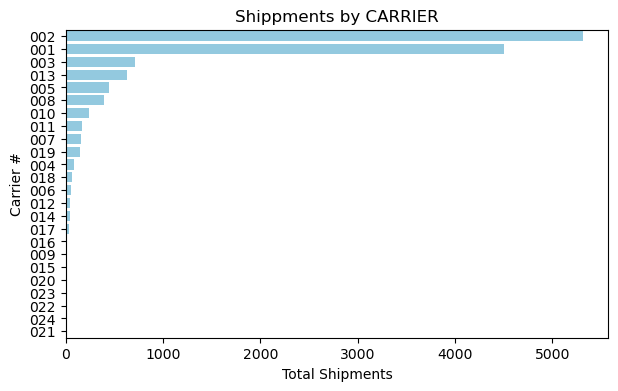

In [19]:
# Clean values, just ID
df_clean['CARRIER'] = df_clean['CARRIER'].str.replace("CARRIER ", "")

# Plotting shipments by CARRIER
CARRIER_uniques = df_clean['CARRIER'].value_counts()
plt.figure(figsize=(7, 4))
sns.barplot(x=CARRIER_uniques.values,
            y=CARRIER_uniques.index, 
            color='skyblue', 
            orient='h'  
           )
plt.title('Shippments by CARRIER', fontsize=12)
plt.xlabel('Total Shipments', fontsize=10)
plt.ylabel('Carrier #', fontsize=10)
plt.show()

We have **2 main carriers**: 002 and 001.

## Countries: FROM_COUNTRY, TO_COUNTRY

Inspecting country names and shippments by country distribution:

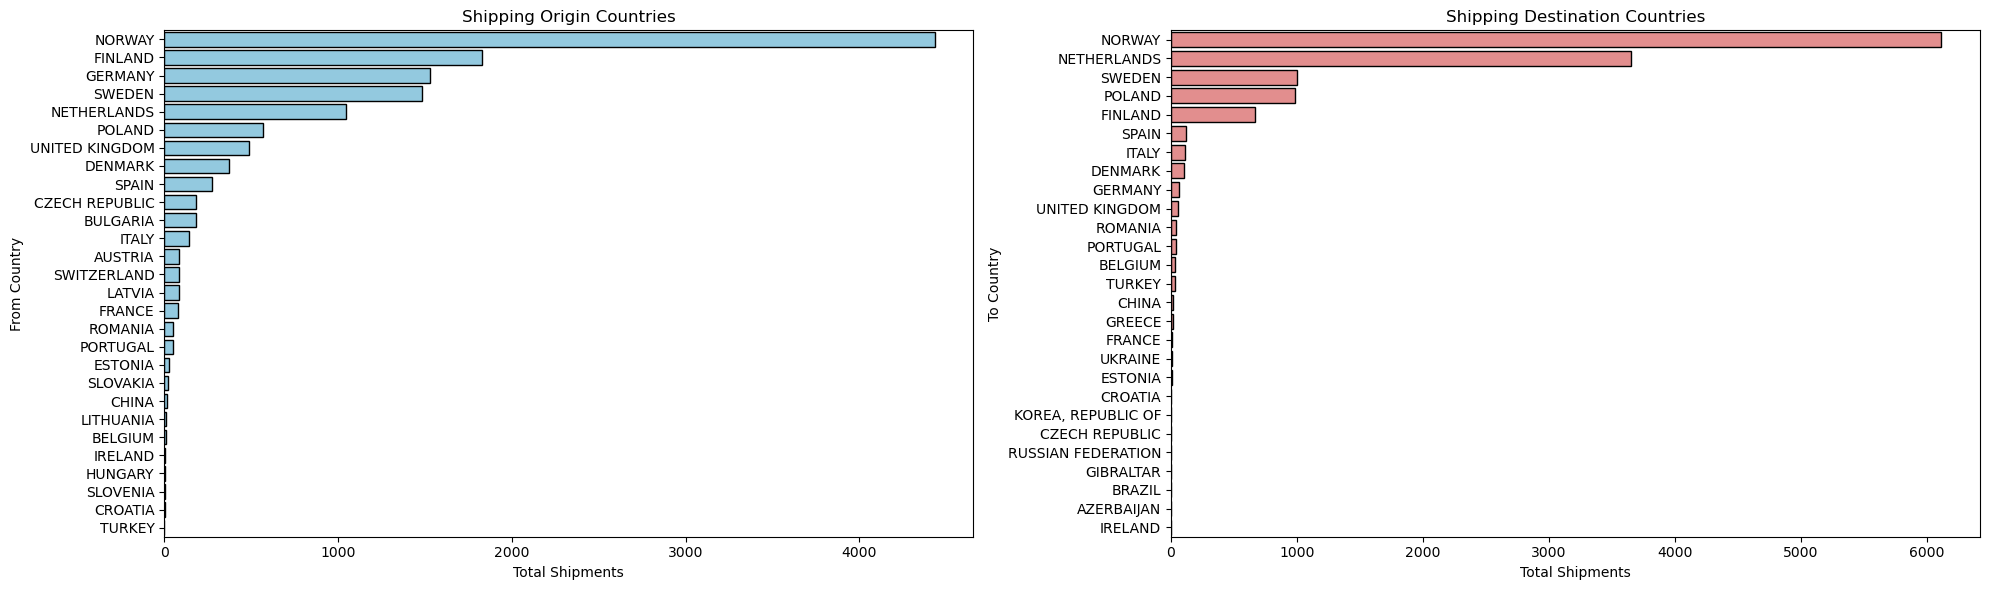

In [20]:
# Unique values
FROM_COUNTRY_uniques = df_clean['FROM_COUNTRY'].value_counts()
TO_COUNTRY_uniques = df_clean['TO_COUNTRY'].value_counts()

# Plotting total shipments by country

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1) 
sns.barplot(
    x=FROM_COUNTRY_uniques.values, 
    y=FROM_COUNTRY_uniques.index,
    color='skyblue', 
    edgecolor='black',
    orient='h'  
)
plt.title('Shipping Origin Countries', fontsize=12)
plt.xlabel('Total Shipments', fontsize=10)
plt.ylabel('From Country', fontsize=10)

plt.subplot(1, 2, 2)  
sns.barplot(
    x=TO_COUNTRY_uniques.values, 
    y=TO_COUNTRY_uniques.index,
    color='lightcoral', 
    edgecolor='black',
    orient='h'  
)
plt.title('Shipping Destination Countries', fontsize=12)
plt.xlabel('Total Shipments', fontsize=10)
plt.ylabel('To Country', fontsize=10)

plt.tight_layout()
plt.show()


Country names are OK. Wow! **Baltic Countries** have a lot of traffic.

## Cities: FROM_CITY, TO_CITY

Let's check city names country by country:

In [21]:
# Combine all cities in FROM_CITY and TO_CITY to standarization

all_countries = FROM_COUNTRY_uniques.add(TO_COUNTRY_uniques, fill_value=0).sort_index()

# Looping all countries in dataset
for country in all_countries.index:
    
    # Filtering shippments by actual country in origin and destination
    df_from_country = df_clean[df_clean['FROM_COUNTRY'] == country]
    df_from_country = df_from_country[['FROM_COUNTRY', 'FROM_CITY', 'FROM_PCODE']]
    df_from_country.columns = ['COUNTRY', 'CITY', 'PCODE']
    
    df_to_country = df_clean[df_clean['TO_COUNTRY'] == country]
    df_to_country = df_to_country[['TO_COUNTRY', 'TO_CITY', 'TO_PCODE']]
    df_to_country.columns = ['COUNTRY', 'CITY', 'PCODE']
    
    # Join both dataframes
    df_country = pd.concat([df_from_country, df_to_country])
    
    # Unique cities of actual country in alphabetical order to check the names
    CITY_uniques = df_country['CITY'].value_counts().sort_index()
    
    print(f"\nCities in {country}:")
    print(CITY_uniques)


Cities in AUSTRIA:
HALLWANG                  1
HALLWANG BEI SALZBURG    11
VIENNA                   11
WELS                     63
Name: CITY, dtype: int64

Cities in AZERBAIJAN:
BAKU    1
Name: CITY, dtype: int64

Cities in BELGIUM:
ANTWERP              4
ANTWERPEN            4
BELGIUM              1
DEINZE               4
KONINGSHOOIKT        8
LEONHOUT             1
LOENHOUT             6
OOSTKAMP            10
SINT GILLIS WAAS     3
ST GILLIS WAAS       1
ZEEBRUGGE            1
Name: CITY, dtype: int64

Cities in BRAZIL:
NITEROI - RJ    1
Name: CITY, dtype: int64

Cities in BULGARIA:
NOVI PAZAR     42
SOFIA          31
VARNA         108
Name: CITY, dtype: int64

Cities in CHINA:
GUANGZHOU                         5
GUANGZHOU GUANGDONG               1
GYUAN BLD. 1,LIUHENG PUTUO DIS    1
HUANGPU                           1
NANJING                           9
NANTONG CITY                      2
RU GAO                            7
RUGAO                             1
WUHAN              

### Cities with wrong countries

With IA help, we know that some cities don't belong to the assigned country:

In [22]:
# Relocating cities to correct countries
df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'FINLAND') & 
    (df_clean['TO_PCODE'] == '9601') & 
    (df_clean['TO_CITY'] == 'HOOGEZAND'), 
    'TO_COUNTRY'
] = 'NETHERLANDS'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'POLAND') & 
    (df_clean['FROM_PCODE'] == '3036') & 
    (df_clean['FROM_CITY'] == 'DRAMMEN'), 
    'FROM_COUNTRY'
] = 'NORWAY'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'UNITED KINGDOM') & 
    (df_clean['TO_PCODE'] == '') & 
    (df_clean['TO_CITY'] == 'GORT'),
    'TO_COUNTRY'
] = 'IRELAND'

### Cleaning city names

Some cities need some **cleaning** and some have **wrong values** that must be removed.

In [23]:
def clean_city_names(df, columns):
    replacements = {
        "HAKUNINITIE 23": "HAKUNINITIE",
        "NITEROI - RJ": "NITEROI",
        "GYUAN BLD. 1,LIUHENG PUTUO DIS": "LIUHENG PUTUO",
        "DESSAU ROSSLAU": "DESSAU-ROSSLAU",
        "FRANZIUSSTRASSE 26 BREMERHAVEN": "BREMERHAVEN",
        "NORDERSTEDT - GERMANY": "NORDERSTEDT",
        "NORDERSTEDT - HAMBURG": "NORDERSTEDT",
        "CIVITAVECCHIA (ROMA)": "CIVITAVECCHIA",
        "FOLLO LA SPEZIA": "FOLLO",
        "MUGGIANO (SP)": "MUGGIANO",
        "ERANDIO (BIZKAIA)": "ERANDIO",
        "MARIN-PONTEVERDA": "MARIN",
        "PALOS DE LA FRONTERA - HUELVA": "PALOS DE LA FRONTERA",
        "TAVSANLI ALTINOVA YALOVA": "TAVSANLI",
        "PASAI DONIBANE (GUIPUZCOA)": "PASAI DONIBANE",
        "SOUTH SHILEDS": "SOUTH SHIELDS",
        "AKEN": "AACHEN",
        "FLORANO MODENESE": "FIORANO MODENESE",
        "IDALST": "", # not a city in NORWAY neither in FRANCE
        "LA SPEZIA (SP)": "",   # not a city
        "EIOSTEROY": "", # not a city
        "PIC RONNY / RENE": "", # not a city
        "KRISSS": "",  # not a city
        "FINLAND": "", # not a city
        "SWEDEN": "", # not a city
        "NETHERLANDS": "", # not a city
        "BELGIUM": "", # not a city
        "NORWAY": "", # not a city
        "SPAIN": "", # not a city
        "CHANGWON CITY": "", # is a Korean City and it is spread throughout different countries!
        "HYDROMECHANIKA": "",  # not a city
        "0": "",   # not a city
        ".": ""   # not a city
    }
    
    for column in columns:
        df[column] = df[column].replace(replacements, regex=False)
        df[column] = df[column].str.strip()
    
    return df

df_clean = clean_city_names(df_clean, ['TO_CITY', 'FROM_CITY'])

### City and postal code mixed!

We have a city called 1782. Let's see if city and postal code columns are mixed, so we dont loose postal code!

In [24]:
df_clean[(df_clean['TO_CITY'] == '1782') | (df_clean['FROM_CITY'] == '1782')]

,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
12303,87956,002,NORWAY,1782,HALDEN,NORWAY,TOMREFJORD,6270,2018-06-15 00:00:00,2018-06-18 00:00:00,2,346.0,1.84,1665.0,1665.0,N,INBOUND


Our hypothesis was OK. Change it!

In [25]:
df_clean.loc[(df_clean['FROM_CITY'] == '1782'), 'FROM_CITY'] = 'HALDEN'
df_clean.loc[(df_clean['FROM_CITY'] == 'HALDEN'), 'FROM_PCODE'] = '1782'

### City names normalization

These cities need a **normalization**. But we should check postal codes before, just to to be sure they are the same city!

#### Sanity check with postal codes

Showing city names that seem to be the same city with their postal codes to check they are the same city:

In [26]:
city_names_all = [
    ["ÅLESUND", "AALESUND", "ALESUND"],
    ["ABERDEEN, UK", "ABERDEEN"],
    ["AMSTERDAM", "SG AMSTERDAM"],
    ["ANTWERP", "ANTWERPEN"],
    ["ARZIGNANO", "ARZIGNANO (VI)", "ARZIGNANO VI"],
    ["ARRETON", "ARRETON IOW", "ARRETON ISLE OF WIGHT"],
    ["BIRKENHEAD MERSEYSIDE", "BIRKENHEAD"],
    ["BODØ", "BODO", "BODOTERMINALEN"],
    ["BREMERHAVEN (FREEPORT-AREA)", "BREMERHAVEN"],
    ["BYDGOSZCZ, UL", "BYDGOSZCZ"],
    ["CASTEL MAGGIORE", "CASTELMAGGIORE"],
    ["DOBELN", "DOEBELN"],
    ["DYCE", "DYCE ABERDEEN"],
    ["DOBELES REG.", "DOBELES REGION"],
    ["DUNFERLINE", "DUNFERMLINE", "DUNFERMLINE FIFE"],
    ["ELBLAG", "ELBLĄG"],
    ["FALMOUTH, CORNWALL", "FALMOUTH"],
    ["FERROL", "FERROL (LA CORUNA)"],
    ["FIRKARSTRAND", "FISKARSTRAND"],
    ["FLORO", "FLORØ"],
    ["FALKOPING", "FALKÖPING"],
    ["FREDERIKSHAVEN", "FREDERIKSHAVN", "FREDRIKSHAVM", "FREDRIKSHAVN"],
    ["GARDEMOEN", "GARDERMOEN"],
    ["GDANSK, POLAND","GDANSK - POLAND","GDANSK"],
    ["GENOVA", "GENOVA GE"],
    ["GIJON", "GIJON ASTURIAS"],
    ["GDYNIA","GYDNIA"],
    ["GOTEBORG", "GOTHENBURG", "GØTEBORG"],
    ["GUANGZHOU", "GUANGZHOU GUANGDONG"],
    ["HALLWANG", "HALLWANG BEI SALZBURG"],
    ["HERFOELGE", "HERFOLGE"],
    ["HJORUNGAVAAG", "HJORUNGAVAG", "HJØRUNGAVÅG"],
    ["HUCKESWAGEN", "HUECKESWAGEN"],
    ["HUNDVAAG", "HUNDVÅG", "HUNDVAG", "HUNGVAG"],
    ["ILMINSTER SOMERSET", "ILMINSTER"],
    ["KVAAL", "KVAL"],
    ["KRISTIANSUN", "KRISTIANSUND"],
    ["JESSHEIM, OSLO", "JESSHEIM"],
    ["LAHOLM STAHL AS", "LAHOLM STAL AB"],
    ["LAKAEVAG", "LAKSEVAAG", "LAKSEVAG"],
    ["LAS PALMAS", "LAS PALMAS DE GRAN CANARIA"],
    ["LEONHOUT", "LOENHOUT"],
    ["LEIRVIK", "LEIRVIK I SOGN"],
    ["LIJNDEN", "LIJNDEN (AMSTERDAM AIRPORT)", "LIJNDEN (AMSTERDAM AIRPORT),"],
    ["LØDINGEN", "LODINGEN"],
    ["LOIU", "LOIU BIZKAIA"],
    ["LONEVAAG", "LONEVAG", "LONEVÅG"],
    ["MJOELKERAAEN", "MJOLKERAEN"],
    ["MASERADA DEL PIAVE", "MASERADA SUL PIAVE"],
    ["NUERNBERG", "NUREMBERG"],
    ["OERNSKOELDSVIK", "ORNSKOLDSVIK"],
    ["OLENSVAG", "ØLENSVÅG"],
    ["OS", "OS ASVO", "OS MASKINERING AS"],
    ["OSTRAVA", "OSTRAVA HRABOVA"],
    ["PANEVEZIO", "PANEVEZYS"],
    ["POOLE, DORSET", "POOLE"],
    ["PORINO", "PORRINO"],
    ["SANDNESSJOEN","SANDNESSJØEN"],
    ["RANDERS SOE", "RANDERS SV"],
    ["REDWITS", "REDWITZ"],
    ["RODOVRE", "ROEDOVRE"],
    ["ROTTERDAM-ALBRANDSWAARD","ROTTERDAM ALBRANDSWAARD","ALBRANDSWAARD - ROTTERDAM", "ALBRANDWAARD - ROTTERDAM", "AS ALBRANDSWAARD ROTTERDAM", "AS ROTTERDAM",
    "JD ROTTERDAM", "LH ROTTERDAM", "ROTTERDAM, NETHERLANDS","ROTTERDAM"],
    ["RU GAO", "RUGAO"],
    ["SCHIO","SCHIO VICENZA"],
    ["SINT GILLIS WAAS", "ST GILLIS WAAS"],
    ["SKOGSVAG", "SKOGSVÅG", "SKOGVAAG"],
    ["STARGARD","STARGARD SZCZECINSKI"],
    ["STOEVRING", "STOVRING"],
    ["TANANGER", "TANANGER, STAVANGER"],
    ["TROLLAASEN", "TROLLASEN"],
    ["TROMSØ", "TROMSO"],
    ["TUZLA", "TUZLA - ISTANBUL", "TUZLA/ISTANBUL"],
    ["VIAREFFIO LU", "VIAREGGIO", "VIAREGGIO (LU),ITALY", "VIAREGGIO LUCCA"],
    ["VIGO", "VIGO PONTEVEDRA", "VIGO, PONTEVEDRA"],
    ["VILA NOVA DE CERVEIRA,", "VILA NOVA DE CERVEIRA", "V. N. CERVEIRA"],
    ["VILAGARCÍA DE AROUSA", "VILLAGARCIA DE AROSA"]
]


for city_names in city_names_all:

    # Defining conditions
    condition_from = df_clean['FROM_CITY'].isin(city_names)
    condition_to = df_clean['TO_CITY'].isin(city_names)
    mask = condition_from | condition_to

    # Selecting rows
    filtered_df = df_clean.loc[mask, ['FROM_CITY', 'TO_CITY', 'FROM_PCODE', 'TO_PCODE']]

    # Selecting the proper field
    filtered_df['CITY'] = np.where(condition_from[mask], filtered_df['FROM_CITY'], filtered_df['TO_CITY'])
    filtered_df['PCODE'] = np.where(condition_from[mask], filtered_df['FROM_PCODE'], filtered_df['TO_PCODE'])
    filtered_df = filtered_df[['CITY', 'PCODE']]

    # Group by CITY and PCODE, count occurrences
    grouped = filtered_df.groupby(['CITY', 'PCODE'])\
                        .size()\
                        .reset_index(name='COUNT')\
                        .sort_values(['PCODE', 'COUNT'], ascending=[True, False])

    print(f"\nCity names: {city_names}")
    print(grouped)


City names: ['ÅLESUND', 'AALESUND', 'ALESUND']
        CITY PCODE  COUNT
3    ALESUND  6001      1
4    ALESUND  6002      5
5    ALESUND  6003      1
0   AALESUND  6004      2
6    ALESUND  6005      6
1   AALESUND  6005      1
13   ÅLESUND  6006      1
7    ALESUND  6007      2
8    ALESUND  6008      1
2   AALESUND  6018    489
9    ALESUND  6018    194
14   ÅLESUND  6018      1
10   ALESUND  6020      1
11   ALESUND  6025      2
12   ALESUND  6280      1

City names: ['ABERDEEN, UK', 'ABERDEEN']
           CITY     PCODE  COUNT
0      ABERDEEN   AB119DB      1
1      ABERDEEN  AB12 3BG      2
7  ABERDEEN, UK  AB21 0GL      2
2      ABERDEEN  AB21 0GL      1
3      ABERDEEN  AB21 7GA      3
4      ABERDEEN  AB23 8EE      1
5      ABERDEEN  AB32 6FL      1
6      ABERDEEN  AB32 6JZ      1

City names: ['AMSTERDAM', 'SG AMSTERDAM']
           CITY    PCODE  COUNT
1  SG AMSTERDAM     1033      1
0     AMSTERDAM  1033 SG      5

City names: ['ANTWERP', 'ANTWERPEN']
        CITY   PCODE


City names: ['LEIRVIK', 'LEIRVIK I SOGN']
             CITY PCODE  COUNT
1  LEIRVIK I SOGN  6953      8
0         LEIRVIK  6953      1

City names: ['LIJNDEN', 'LIJNDEN (AMSTERDAM AIRPORT)', 'LIJNDEN (AMSTERDAM AIRPORT),']
                           CITY    PCODE  COUNT
2   LIJNDEN (AMSTERDAM AIRPORT)  1175 RA      4
3  LIJNDEN (AMSTERDAM AIRPORT),  1175 RA      4
0                       LIJNDEN  1175 RA      1
1                       LIJNDEN  1175 RB      1

City names: ['LØDINGEN', 'LODINGEN']
       CITY PCODE  COUNT
0  LODINGEN  8410      2
1  LØDINGEN  8410      1

City names: ['LOIU', 'LOIU BIZKAIA']
           CITY  PCODE  COUNT
1  LOIU BIZKAIA  48180      3
0          LOIU  48180      1

City names: ['LONEVAAG', 'LONEVAG', 'LONEVÅG']
       CITY PCODE  COUNT
0  LONEVAAG  5282     83
2   LONEVÅG  5282     72
1   LONEVAG  5282     29

City names: ['MJOELKERAAEN', 'MJOLKERAEN']
           CITY PCODE  COUNT
1    MJOLKERAEN  5136     18
0  MJOELKERAAEN  5136      1

City names: ['M

### City names Normalization

With the info above, we can replace city names with our normalized name (more occurrences). 

But before normalization, some changes to avoid loosing information:

In [27]:
df_clean.loc[(df_clean['TO_PCODE'] == '1033') & (df_clean['TO_CITY'] == 'SG AMSTERDAM'), 'TO_PCODE'] = '1033SG'
df_clean.loc[(df_clean['TO_CITY'] == 'JD ROTTERDAM'), 'TO_PCODE'] = '3089JD'
df_clean.loc[(df_clean['TO_CITY'] == 'AS ROTTERDAM'), 'TO_PCODE'] = '3165AS'
df_clean.loc[(df_clean['TO_CITY'] == 'LH ROTTERDAM'), 'TO_PCODE'] = '3197LH'
df_clean.loc[(df_clean['TO_CITY'] == 'AS ALBRANDSWAARD ROTTERDAM'), 'TO_PCODE'] = '3165AS'

In [28]:
# Standard city names
city_mapping = {
    "ANTWERPEN": ["ANTWERP", "ANTWERPEN"],
    "SCHIO": ["SCHIO","SCHIO VICENZA"],
    "HALLWANG": ["HALLWANG","HALLWANG BEI SALZBURG"],
    "GUANGZHOU": ["GUANGZHOU", "GUANGZHOU GUANGDONG"],
    "BREMERHAVEN": ["BREMERHAVEN (FREEPORT-AREA)", "BREMERHAVEN"],
    "DOEBELN": ["DOBELN", "DOEBELN"],
    "ROTTERDAM": ["ROTTERDAM-ALBRANDSWAARD","ROTTERDAM ALBRANDSWAARD","ALBRANDSWAARD - ROTTERDAM", 
                  "ALBRANDWAARD - ROTTERDAM", "AS ALBRANDSWAARD ROTTERDAM", "AS ROTTERDAM",
                  "JD ROTTERDAM", "LH ROTTERDAM", "ROTTERDAM, NETHERLANDS","ROTTERDAM"],
    "LIJNDEN": ["LIJNDEN", "LIJNDEN (AMSTERDAM AIRPORT)", "LIJNDEN (AMSTERDAM AIRPORT),"],
    "BODØ": ["BODØ", "BODO", "BODOTERMINALEN"],
    "GARDERMOEN": ["GARDEMOEN", "GARDERMOEN"],
    "GDYNIA":  ["GDYNIA","GYDNIA"],
    "LEIRVIK": ["LEIRVIK", "LEIRVIK I SOGN"],
    "MJOLKERAEN": ["MJOELKERAAEN", "MJOLKERAEN"],
    "TANANGER": ["TANANGER", "TANANGER, STAVANGER"],
    "STARGARD": ["STARGARD","STARGARD SZCZECINSKI"],
    "RANDERS": ["RANDERS SOE", "RANDERS SV"],
    "PORRINO": ["PORINO", "PORRINO"],
    "LAHOLM STAHL": ["LAHOLM STAHL AS", "LAHOLM STAL AB"],
    "HUECKESWAGEN": ['HUCKESWAGEN', 'HUECKESWAGEN'],
    "DUNFERMLINE": ["DUNFERLINE", "DUNFERMLINE", "DUNFERMLINE FIFE"],
    "BIRKENHEAD": ["BIRKENHEAD MERSEYSIDE", "BIRKENHEAD"],
    "DYCE": ["DYCE", "DYCE ABERDEEN"],
    "ILMINSTER": ["ILMINSTER SOMERSET", "ILMINSTER"],
    "POOLE": ["POOLE, DORSET", "POOLE"],
    "FALMOUTH": ["FALMOUTH, CORNWALL", "FALMOUTH"],
    "ABERDEEN": ["ABERDEEN, UK", "ABERDEEN"],
    "TUZLA": ["TUZLA", "TUZLA - ISTANBUL", "TUZLA/ISTANBUL"],
    "GÖTEBORG": ["GOTEBORG", "GOTHENBURG", "GØTEBORG"],
    "FALKÖPING": ["FALKOPING", "FALKÖPING"],
    "VILLAGARCIA DE AROUSA": ["VILAGARCÍA DE AROUSA", "VILLAGARCIA DE AROSA"],
    "VIGO": ["VIGO", "VIGO PONTEVEDRA", "VIGO, PONTEVEDRA"],
    "LOIU": ["LOIU", "LOIU BIZKAIA"],
    "FERROL": ["FERROL", "FERROL (LA CORUNA)"],
    "GIJON": ["GIJON", "GIJON ASTURIAS"],
    "VILA NOVA DE CERVEIRA": ["VILA NOVA DE CERVEIRA,", "VILA NOVA DE CERVEIRA", "V. N. CERVEIRA"],
    "GDANSK": ["GDANSK, POLAND","GDANSK - POLAND","GDANSK"],
    "BYDGOSZCZ": ["BYDGOSZCZ, UL", "BYDGOSZCZ"],
    "ØLENSVÅG": ["OLENSVAG", "ØLENSVÅG"],
    "TROMSØ": ["TROMSØ", "TROMSO"],
    "SANDNESSJØEN": ["SANDNESSJOEN","SANDNESSJØEN"],
    "LØDINGEN": ["LØDINGEN", "LODINGEN"],
    "KRISTIANSUND": ["KRISTIANSUN", "KRISTIANSUND"],
    "JESSHEIM": ["JESSHEIM, OSLO", "JESSHEIM"],
    "FLORØ": ["FLORO", "FLORØ"],
    "AMSTERDAM": ["AMSTERDAM", "SG AMSTERDAM"],
    "VIAREGGIO": ["VIAREFFIO LU", "VIAREGGIO LU", "VIAREGGIO", "VIAREGGIO (LU),ITALY", "VIAREGGIO LUCCA"],
    "GENOVA": ["GENOVA", "GENOVA GE"],
    "ARZIGNANO": ["ARZIGNANO", "ARZIGNANO (VI)", "ARZIGNANO VI"],
    "ST GILLIS WAAS": ["SINT GILLIS WAAS", "ST GILLIS WAAS"],
    "LOENHOUT": ["LEONHOUT", "LOENHOUT"],
    "RU GAO": ["RU GAO", "RUGAO"],
    "HJØRUNGAVÅG": ["HJORUNGAVAAG", "HJORUNGAVAG", "HJØRUNGAVÅG"],
    "ÅLESUND": ["ÅLESUND", "AALESUND", "ALESUND"],
    "KVAAL": ["KVAAL", "KVAL"],
    "LAKAEVAAG": ["LAKAEVAG", "LAKSEVAAG", "LAKSEVAG"],
    "LONEVÅG": ["LONEVAAG", "LONEVAG", "LONEVÅG"],
    "HUNDVÅG": ["HUNDVAAG", "HUNDVÅG", "HUNDVAG", "HUNGVAG"],
    "OS": ["OS", "OS ASVO", "OS MASKINERING AS"],
    "FISKARSTRAND": ["FIRKARSTRAND", "FISKARSTRAND"],
    "SKOGSVÅG": ["SKOGSVAG", "SKOGSVÅG", "SKOGVAAG"],
    "ORNSKOLDSVIK": ["OERNSKOELDSVIK", "ORNSKOLDSVIK"],
    "TROLLAASEN": ["TROLLAASEN", "TROLLASEN"],
    "HUECKESWAGEN": ["HUCKESWAGEN", "HUECKESWAGEN"],
    "NUREMBERG": ["NUERNBERG", "NUREMBERG"],
    "REDWITZ": ["REDWITS", "REDWITZ"],
    "ELBLAG": ["ELBLAG", "ELBLĄG"],
    "ARRETON": ["ARRETON", "ARRETON IOW", "ARRETON ISLE OF WIGHT"],
    "FREDERIKSHAVN": ["FREDERIKSHAVEN", "FREDERIKSHAVN", "FREDRIKSHAVM", "FREDRIKSHAVN"],
    "HERFOELGE": ["HERFOELGE", "HERFOLGE"],
    "RANDERS": ["RANDERS SOE", "RANDERS SV"],
    "ROEDOVRE": ["RODOVRE", "ROEDOVRE"],
    "STOEVRING": ["STOEVRING", "STOVRING"],
    "CASTEL MAGGIORE": ["CASTEL MAGGIORE", "CASTELMAGGIORE"],
    "MASERADA SUL PIAVE": ["MASERADA DEL PIAVE", "MASERADA SUL PIAVE"],
    "DOBELES": ["DOBELES REG.", "DOBELES REGION"],
    "PANEVEZYS": ["PANEVEZIO", "PANEVEZYS"],
    "LAS PALMAS": ["LAS PALMAS", "LAS PALMAS DE GRAN CANARIA"]
}

# Invert to create a reverse map
reverse_mapping = {v: k for k, values in city_mapping.items() for v in values}

# map to replace, fillna in case there is no result
df_clean['TO_CITY'] = df_clean['TO_CITY'].map(reverse_mapping).fillna(df_clean['TO_CITY'])
df_clean['FROM_CITY'] = df_clean['FROM_CITY'].map(reverse_mapping).fillna(df_clean['FROM_CITY'])

### Normalized and clean city names

These are the new clean and normalized city names:

In [29]:
# Looping all countries in dataset
for country in all_countries.index:
    
    # Filtering shippments by actual country in origin and destination
    df_from_country = df_clean[df_clean['FROM_COUNTRY'] == country]
    df_from_country = df_from_country[['FROM_COUNTRY', 'FROM_CITY', 'FROM_PCODE']]
    df_from_country.columns = ['COUNTRY', 'CITY', 'PCODE']
    
    df_to_country = df_clean[df_clean['TO_COUNTRY'] == country]
    df_to_country = df_to_country[['TO_COUNTRY', 'TO_CITY', 'TO_PCODE']]
    df_to_country.columns = ['COUNTRY', 'CITY', 'PCODE']
    
    # Join both dataframes
    df_country = pd.concat([df_from_country, df_to_country])
    
    # Unique cities of actual country in alphabetical order to check the names
    CITY_uniques = df_country['CITY'].value_counts().sort_index()
    
    print(f"\nCities in {country}:")
    print(CITY_uniques)


Cities in AUSTRIA:
HALLWANG    12
VIENNA      11
WELS        63
Name: CITY, dtype: int64

Cities in AZERBAIJAN:
BAKU    1
Name: CITY, dtype: int64

Cities in BELGIUM:
                   1
ANTWERPEN          8
DEINZE             4
KONINGSHOOIKT      8
LOENHOUT           7
OOSTKAMP          10
ST GILLIS WAAS     4
ZEEBRUGGE          1
Name: CITY, dtype: int64

Cities in BRAZIL:
NITEROI    1
Name: CITY, dtype: int64

Cities in BULGARIA:
NOVI PAZAR     42
SOFIA          31
VARNA         108
Name: CITY, dtype: int64

Cities in CHINA:
GUANGZHOU        6
HUANGPU          1
LIUHENG PUTUO    1
NANJING          9
NANTONG CITY     2
RU GAO           8
WUHAN            1
WUXI             1
YANGZHOU         1
Name: CITY, dtype: int64

Cities in CROATIA:
PULA    4
Name: CITY, dtype: int64

Cities in CZECH REPUBLIC:
BLANSKO              14
CERVENKA              3
KUTNA HORA            3
OSTRAVA               8
OSTRAVA HRABOVA       1
OSTRAVA-VITKOVICE     1
PLANA N LUZNICI       1
PROSTEJOV         

## Postal Codes: FROM_PCODE, TO_PCODE

Let's see how postal codes look like. They are grouped by country and occurrences are shown:

In [30]:
for country in all_countries.index:
    
    # Filtering shippments by actual country in origin and destination
    df_from_country = df_clean[df_clean['FROM_COUNTRY'] == country]
    df_from_country = df_from_country[['FROM_COUNTRY', 'FROM_CITY', 'FROM_PCODE']]
    df_from_country.columns = ['COUNTRY', 'CITY', 'PCODE']
    
    df_to_country = df_clean[df_clean['TO_COUNTRY'] == country]
    df_to_country = df_to_country[['TO_COUNTRY', 'TO_CITY', 'TO_PCODE']]
    df_to_country.columns = ['COUNTRY', 'CITY', 'PCODE']
    
    # Join both
    df_country = pd.concat([df_from_country, df_to_country])
    
    # Unique cities of actual country in alphabetical order to check the names
    PCODE_uniques = df_country['PCODE'].value_counts().sort_index()
    
    print(f"\nPostal codes in {country}:")
    print(PCODE_uniques)


Postal codes in AUSTRIA:
1220    11
4600    63
5300    12
Name: PCODE, dtype: int64

Postal codes in AZERBAIJAN:
AZ1083    1
Name: PCODE, dtype: int64

Postal codes in BELGIUM:
20         1
2030       1
2040       4
2060       1
2500       8
2990       7
8020       8
8210       1
8380       1
9170       4
9710       1
9800       4
B 2060     1
BE-8020    1
Name: PCODE, dtype: int64

Postal codes in BRAZIL:
24.040-005    1
Name: PCODE, dtype: int64

Postal codes in BULGARIA:
1360    31
9000    40
9009    68
9900    42
Name: PCODE, dtype: int64

Postal codes in CHINA:
200001    1
210015    9
214161    1
225217    1
226005    2
226542    8
316131    1
430014    1
511450    6
Name: PCODE, dtype: int64

Postal codes in CROATIA:
52100    4
Name: PCODE, dtype: int64

Postal codes in CZECH REPUBLIC:
28449      3
39102      1
591 01     8
59101      5
678 01     5
67801      9
688 28    53
70602      9
720 00     1
75501      1
76321     40
78401      3
796 01    41
79601      4
Name: PCODE, d

### Postal codes cleaning

First, we are going to delete blanks and hyphens.

In [31]:
df_clean['FROM_PCODE'] = df_clean['FROM_PCODE'].str.replace(r'[\s-]', '', regex=True)
df_clean['TO_PCODE'] = df_clean['TO_PCODE'].str.replace(r'[\s-]', '', regex=True)

Cleaning codes country by country:

In [32]:
# countries with letters in their postal codes not to remove!
letter_countries = ["IRELAND", "NETHERLANDS", "UNITED KINGDOM"]
all_countries_list = all_countries.index.tolist()
digit_countries = list(set(all_countries_list) - set(letter_countries))

substring_to_remove = ["NYBORG", "TRESFJORD", "BE", "DK", "LG", "FI", 
                       "LV", "LT", "PL", "NO", "SE", "SI", "CH", "AZ",
                       "D", "N", "S", "E", "B" ]

for country in digit_countries:
    
    for substring in substring_to_remove:
        # Remove substrings from TO_PCODE where TO_COUNTRY matches the country
        df_clean.loc[df_clean['TO_COUNTRY'] == country, 'TO_PCODE'] = (
            df_clean.loc[df_clean['TO_COUNTRY'] == country, 'TO_PCODE'].str.replace(substring, '', regex=True)
        )
        # Remove substrings from FROM_PCODE where FROM_COUNTRY matches the country
        df_clean.loc[df_clean['FROM_COUNTRY'] == country, 'FROM_PCODE'] = (
            df_clean.loc[df_clean['FROM_COUNTRY'] == country, 'FROM_PCODE'].str.replace(substring, '', regex=True)
        )

### Obtaining complete postal codes automatically 

There are some incomplete codes or with wrong format. Let's try to get the full code by the city name. Automatic detection and replacement:

In [33]:
# Correct number of positions in postal codes by country
mapping_positions = {
    "FINLAND": 5,
    "GERMANY": 5,
    "NETHERLANDS": 6,
    "NORWAY": 4,
    "POLAND": 5,
    "PORTUGAL": 7,
    "ROMANIA": 6,
    "SLOVAKIA": 5,
    "SPAIN": 5,
    "SWEDEN": 5,
    "UNITED KINGDOM": 7 # just for loop
}

# Looping countries
for country, num_digits in mapping_positions.items():
        
    # ---------------- Destination wrong codes ---------------------------
    
    # Detecting where TO_PCODE has a different number of positions
    
    # UK codes length is [5-7] and need special handle
    if country == 'UNITED KINGDOM':
        mask_TO = (
            (df_clean['TO_COUNTRY'] == country) &
            ((df_clean['TO_PCODE'].str.len() < 5) | 
             (df_clean['TO_PCODE'].str.len() > 7))
        )
    else:
        mask_TO = (
            (df_clean['TO_COUNTRY'] == country) &
            ((df_clean['TO_PCODE'].str.len() < num_digits) | 
             (df_clean['TO_PCODE'].str.len() > num_digits))
        )
    wrong_codes_TO_df = df_clean[mask_TO]
    
    if not wrong_codes_TO_df.empty:
        for _, row in  wrong_codes_TO_df.iterrows():
            city = row['TO_CITY']
            pcode = row['TO_PCODE']
            print(f"Country: {country}, Incorrect TO_PCODE: {pcode}, City: {city}")
            
            # Searching the correct code-----------------------
            # in destination
            if country == 'UNITED KINGDOM':
                correct_TO_codes_df = df_clean[
                    (df_clean['TO_CITY'] == city) &
                    (df_clean['TO_COUNTRY'] == country) &
                    (df_clean['TO_PCODE'].str.len() > 4) &
                    (df_clean['TO_PCODE'].str.len() < 8)
                ].copy().drop_duplicates(subset=['TO_PCODE', 'TO_CITY'], 
                                         keep='first')
            else:
                correct_TO_codes_df = df_clean[
                    (df_clean['TO_CITY'] == city) &
                    (df_clean['TO_COUNTRY'] == country) &
                    (df_clean['TO_PCODE'].str.len() == num_digits)
                ].copy().drop_duplicates(subset=['TO_PCODE', 'TO_CITY'], 
                                         keep='first')
                
            correct_TO_codes_df = correct_TO_codes_df[['TO_PCODE', 'TO_CITY']]
            correct_TO_codes_df.columns = ['CODE', 'CITY']
            
            # in origin
            if country == 'UNITED KINGDOM':
                correct_FROM_codes_df = df_clean[
                    (df_clean['FROM_CITY'] == city) &
                    (df_clean['FROM_COUNTRY'] == country) &
                    (df_clean['FROM_PCODE'].str.len() > 4) &
                    (df_clean['FROM_PCODE'].str.len() < 8)
                ].copy().drop_duplicates(subset=['FROM_PCODE', 'FROM_CITY'], 
                                         keep='first')
            else:
                correct_FROM_codes_df = df_clean[
                    (df_clean['FROM_CITY'] == city) &
                    (df_clean['FROM_COUNTRY'] == country) &
                    (df_clean['FROM_PCODE'].str.len() == num_digits)
                ].copy().drop_duplicates(subset=['FROM_PCODE', 'FROM_CITY'], 
                                         keep='first')
                
            correct_FROM_codes_df = correct_FROM_codes_df[['FROM_PCODE', 'FROM_CITY']]
            correct_FROM_codes_df.columns = ['CODE', 'CITY']
            
            # Join both dataframes if exist
            if (not correct_TO_codes_df.empty) and \
               (not correct_FROM_codes_df.empty):
                
                correct_codes_df = pd.concat([correct_TO_codes_df, correct_FROM_codes_df])\
                                     .drop_duplicates(keep='first')
                
            elif not correct_TO_codes_df.empty:
                correct_codes_df = correct_TO_codes_df
                
            elif not correct_FROM_codes_df.empty:
                correct_codes_df = correct_FROM_codes_df
                
            else:
                print(f"No correct code available for {city}")
                print("-" * 40)

                
            # Correcting codes-------------------------------------
        
            if (not correct_TO_codes_df.empty) or \
               (not correct_FROM_codes_df.empty):
                
                print(f"Possible correct CODE(s) for city '{city}':")
                print(correct_codes_df)
                
                # Correcting wrong code in origin and destination
                mask1 = ((df_clean['TO_CITY'] == city) &
                        (df_clean['TO_COUNTRY'] == country) &
                        (df_clean['TO_PCODE'] == pcode))
                mask2 = ((df_clean['FROM_CITY'] == city) &
                        (df_clean['FROM_COUNTRY'] == country) &
                        (df_clean['FROM_PCODE'] == pcode))
                
                # only 1 code was found
                if correct_codes_df.shape[0] == 1:  
                    code_OK = correct_codes_df['CODE'].iloc[0]
                    df_clean.loc[mask1, 'TO_PCODE'] = code_OK
                    df_clean.loc[mask2, 'FROM_PCODE'] = code_OK
                    print(f"Code has been corrected with value {code_OK}")
                    print("-" * 40)
                
                # more than 1 correct code were founded    
                else: 
                    code_OK = ""
                    # choose which contains the wrong code
                    for _, row in correct_codes_df.iterrows():
                        if (country != "UNITED KINDDOM") and \
                           (len(pcode) < num_digits) and \
                           (pcode in str(row['CODE'])):
                            
                            code_OK = row['CODE']
                            break
                            
                        elif (country != "UNITED KINDDOM") and \
                           (len(pcode) > num_digits) and \
                           (str(row['CODE']) in pcode):
                            code_OK = row['CODE']
                            break
                        
                        elif (country == "UNITED KINDDOM") and \
                           (len(pcode) < 5) and \
                           (pcode in str(row['CODE'])):
                            
                            code_OK = row['CODE']
                            break
                            
                        elif (country == "UNITED KINDDOM") and \
                           (len(pcode) > 7) and \
                           (str(row['CODE']) in pcode):
                            code_OK = row['CODE']
                            break
                
                    # Replace code if available         
                    if code_OK != "":
                        df_clean.loc[mask1, 'TO_PCODE'] = code_OK
                        df_clean.loc[mask2, 'FROM_PCODE'] = code_OK
                        print(f"Code has been corrected with value {code_OK}")
                        print("-" * 40)
                    else:
                        print(f"Code could not be corrected.")
                        print("-" * 40)

            
    # ---------------- Origin wrong codes -------------------------------
    
    # Detecting where FROM_PCODE has a different number of positions
    
    if country == 'UNITED KINGDOM':
        mask_FROM = (
            (df_clean['FROM_COUNTRY'] == country) &
            ((df_clean['FROM_PCODE'].str.len() < 5) | 
             (df_clean['FROM_PCODE'].str.len() > 7))
        )
    else:
        mask_FROM = (
            (df_clean['FROM_COUNTRY'] == country) &
            ((df_clean['FROM_PCODE'].str.len() < num_digits) | 
             (df_clean['FROM_PCODE'].str.len() > num_digits))
        )
    
    wrong_codes_FROM_df = df_clean[mask_FROM]
    
    if not wrong_codes_FROM_df.empty:
        for _, row in  wrong_codes_FROM_df.iterrows():
            
            city = row['FROM_CITY']
            pcode = row['FROM_PCODE']
            print(f"Country: {country}, Incorrect FROM_PCODE: {row['FROM_PCODE']}, City: {city}")
            
            # Searching the correct code-----------------------
            # in destination
            if country == 'UNITED KINGDOM':
                correct_TO_codes_df = df_clean[
                    (df_clean['TO_CITY'] == city) &
                    (df_clean['TO_COUNTRY'] == country) &
                    (df_clean['TO_PCODE'].str.len() > 4) &
                    (df_clean['TO_PCODE'].str.len() < 8)
                ].copy().drop_duplicates(subset=['TO_PCODE', 'TO_CITY'], 
                                         keep='first')
            else:
                correct_TO_codes_df = df_clean[
                    (df_clean['TO_CITY'] == city) &
                    (df_clean['TO_COUNTRY'] == country) &
                    (df_clean['TO_PCODE'].str.len() == num_digits)
                ].copy().drop_duplicates(subset=['TO_PCODE', 'TO_CITY'], 
                                         keep='first')
                
            correct_TO_codes_df = correct_TO_codes_df[['TO_PCODE', 'TO_CITY']]
            correct_TO_codes_df.columns = ['CODE', 'CITY']
            
            # in origin
            if country == 'UNITED KINGDOM':
                correct_FROM_codes_df = df_clean[
                    (df_clean['FROM_CITY'] == city) &
                    (df_clean['FROM_COUNTRY'] == country) &
                    (df_clean['FROM_PCODE'].str.len() > 4) &
                    (df_clean['FROM_PCODE'].str.len() < 8)
                ].copy().drop_duplicates(subset=['FROM_PCODE', 'FROM_CITY'], 
                                         keep='first')
            else:
                correct_FROM_codes_df = df_clean[
                    (df_clean['FROM_CITY'] == city) &
                    (df_clean['FROM_COUNTRY'] == country) &
                    (df_clean['FROM_PCODE'].str.len() == num_digits)
                ].copy().drop_duplicates(subset=['FROM_PCODE', 'FROM_CITY'], 
                                         keep='first')
                
            correct_FROM_codes_df = correct_FROM_codes_df[['FROM_PCODE', 'FROM_CITY']]
            correct_FROM_codes_df.columns = ['CODE', 'CITY']
            
            # Join origin and destination
            if (not correct_TO_codes_df.empty) and \
               (not correct_FROM_codes_df.empty):
                
                correct_codes_df = pd.concat([correct_TO_codes_df, correct_FROM_codes_df])\
                                    .drop_duplicates(keep='first')
                
            elif not correct_TO_codes_df.empty:
                correct_codes_df = correct_TO_codes_df
            elif not correct_FROM_codes_df.empty:
                correct_codes_df = correct_FROM_codes_df
            else:
                print(f"No correct code available for {city}")
                print("-" * 40)
                

            # Correcting codes-------------------------------------
            
            if (not correct_TO_codes_df.empty) or \
               (not correct_FROM_codes_df.empty):
                
                print(f"Possible correct CODE(s) for city '{city}':")
                print(correct_codes_df)
                
                # Correcting in origin and destination
                mask1 = ((df_clean['TO_CITY'] == city) &
                        (df_clean['TO_COUNTRY'] == country) &
                        (df_clean['TO_PCODE'] == row['FROM_PCODE']))
                mask2 = ((df_clean['FROM_CITY'] == city) &
                        (df_clean['FROM_COUNTRY'] == country) &
                        (df_clean['FROM_PCODE'] == row['FROM_PCODE']))
                
                # only 1 code was found
                if correct_codes_df.shape[0] == 1:  
                    code_OK = correct_codes_df['CODE'].iloc[0]
                    df_clean.loc[mask1, 'TO_PCODE'] = code_OK
                    df_clean.loc[mask2, 'FROM_PCODE'] = code_OK
                    print(f"Code has been corrected with value {code_OK}")
                    print("-" * 40)
                    
                # more than 1 correct code were founded 
                else:
                    code_OK = ""
                    # choose which contains the wrong code 
                    for _, row in correct_codes_df.iterrows():
                        if (country != "UNITED KINDDOM") and \
                           (len(pcode) < num_digits) and \
                           (pcode in str(row['CODE'])):
                            
                            code_OK = row['CODE']
                            break
                            
                        elif (country != "UNITED KINDDOM") and \
                           (len(pcode) > num_digits) and \
                           (str(row['CODE']) in pcode):
                            code_OK = row['CODE']
                            break
                        
                        elif (country == "UNITED KINDDOM") and \
                           (len(pcode) < 5) and \
                           (pcode in str(row['CODE'])):
                            
                            code_OK = row['CODE']
                            break
                            
                        elif (country == "UNITED KINDDOM") and \
                           (len(pcode) > 7) and \
                           (str(row['CODE']) in pcode):
                            code_OK = row['CODE']
                            break
                            
                    # Replace code if available         
                    if code_OK != "":
                        df_clean.loc[mask1, 'TO_PCODE'] = code_OK
                        df_clean.loc[mask2, 'FROM_PCODE'] = code_OK
                        print(f"Code has been corrected with value {code_OK}")
                        print("-" * 40)
                    else:
                        print(f"Code could not be corrected.")
                        print("-" * 40)

Country: FINLAND, Incorrect TO_PCODE: 0, City: KANKAANPAA
Possible correct CODE(s) for city 'KANKAANPAA':
      CODE        CITY
376  38700  KANKAANPAA
Code has been corrected with value 38700
----------------------------------------
Country: FINLAND, Incorrect TO_PCODE: 0, City: KANKAANPAA
Possible correct CODE(s) for city 'KANKAANPAA':
       CODE        CITY
2586  38700  KANKAANPAA
Code has been corrected with value 38700
----------------------------------------
Country: FINLAND, Incorrect TO_PCODE: 0, City: KANKAANPAA
Possible correct CODE(s) for city 'KANKAANPAA':
       CODE        CITY
2586  38700  KANKAANPAA
Code has been corrected with value 38700
----------------------------------------
Country: FINLAND, Incorrect TO_PCODE: 9601, City: HOOGEZAND
No correct code available for HOOGEZAND
----------------------------------------
Country: FINLAND, Incorrect TO_PCODE: 9601, City: HOOGEZAND
No correct code available for HOOGEZAND
----------------------------------------
Country: FIN

Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
416   01650  VANTAA
481   01740  VANTAA
979   01720  VANTAA
1689  01730  VANTAA
Code has been corrected with value 01510
----------------------------------------
Country: FINLAND, Incorrect FROM_PCODE: 1510, City: VANTAA
Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
416   01650  VANTAA
481   01740  VANTAA
979   01720  VANTAA
1689  01730  VANTAA
Code has been corrected with value 01510
----------------------------------------
Country: FINLAND, Incorrect FROM_PCODE: 1510, City: VANTAA
Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
416   01650  VANTAA
481   01740  VANTAA
979   01720  VANTAA
1689  01730  VANTAA
Code has been corrected with value 01510
----------------------------------------
Country: FINLAND, Incorrect FROM_PCODE: 1510, City: VANTAA
Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
4

Code has been corrected with value 01510
----------------------------------------
Country: FINLAND, Incorrect FROM_PCODE: 1510, City: VANTAA
Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
416   01650  VANTAA
481   01740  VANTAA
979   01720  VANTAA
1689  01730  VANTAA
Code has been corrected with value 01510
----------------------------------------
Country: FINLAND, Incorrect FROM_PCODE: 1510, City: VANTAA
Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
416   01650  VANTAA
481   01740  VANTAA
979   01720  VANTAA
1689  01730  VANTAA
Code has been corrected with value 01510
----------------------------------------
Country: FINLAND, Incorrect FROM_PCODE: 1740, City: VANTAA
Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
416   01650  VANTAA
481   01740  VANTAA
979   01720  VANTAA
1689  01730  VANTAA
Code has been corrected with value 01740
----------------------------------------
Cou

Possible correct CODE(s) for city 'ESPOO':
       CODE   CITY
224   02920  ESPOO
2245  02450  ESPOO
Code has been corrected with value 02920
----------------------------------------
Country: FINLAND, Incorrect FROM_PCODE: 1510, City: VANTAA
Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
416   01650  VANTAA
481   01740  VANTAA
979   01720  VANTAA
1689  01730  VANTAA
Code has been corrected with value 01510
----------------------------------------
Country: FINLAND, Incorrect FROM_PCODE: 1510, City: VANTAA
Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
416   01650  VANTAA
481   01740  VANTAA
979   01720  VANTAA
1689  01730  VANTAA
Code has been corrected with value 01510
----------------------------------------
Country: FINLAND, Incorrect FROM_PCODE: 1510, City: VANTAA
Possible correct CODE(s) for city 'VANTAA':
       CODE    CITY
169   01510  VANTAA
416   01650  VANTAA
481   01740  VANTAA
979   01720  VANTAA
1689 

Code has been corrected with value 09337
----------------------------------------
Country: GERMANY, Incorrect FROM_PCODE: 9337, City: HOHENSTEIN-ERNSTTHAL
Possible correct CODE(s) for city 'HOHENSTEIN-ERNSTTHAL':
     CODE                  CITY
63  09337  HOHENSTEIN-ERNSTTHAL
Code has been corrected with value 09337
----------------------------------------
Country: GERMANY, Incorrect FROM_PCODE: 9337, City: HOHENSTEIN-ERNSTTHAL
Possible correct CODE(s) for city 'HOHENSTEIN-ERNSTTHAL':
     CODE                  CITY
63  09337  HOHENSTEIN-ERNSTTHAL
Code has been corrected with value 09337
----------------------------------------
Country: GERMANY, Incorrect FROM_PCODE: 6385, City: AACHEN
Possible correct CODE(s) for city 'AACHEN':
      CODE    CITY
706  06385  AACHEN
Code has been corrected with value 06385
----------------------------------------
Country: GERMANY, Incorrect FROM_PCODE: 9337, City: HOHENSTEIN-ERNSTTHAL
Possible correct CODE(s) for city 'HOHENSTEIN-ERNSTTHAL':
     CODE 

Possible correct CODE(s) for city 'DESSAU-ROSSLAU':
     CODE            CITY
32  06844  DESSAU-ROSSLAU
Code has been corrected with value 06844
----------------------------------------
Country: GERMANY, Incorrect FROM_PCODE: 4720, City: DOEBELN
Possible correct CODE(s) for city 'DOEBELN':
       CODE     CITY
1555  04720  DOEBELN
Code has been corrected with value 04720
----------------------------------------
Country: GERMANY, Incorrect FROM_PCODE: 6385, City: AACHEN
Possible correct CODE(s) for city 'AACHEN':
      CODE    CITY
706  06385  AACHEN
Code has been corrected with value 06385
----------------------------------------
Country: GERMANY, Incorrect FROM_PCODE: 6385, City: AACHEN
Possible correct CODE(s) for city 'AACHEN':
      CODE    CITY
706  06385  AACHEN
Code has been corrected with value 06385
----------------------------------------
Country: GERMANY, Incorrect FROM_PCODE: 6385, City: AACHEN
Possible correct CODE(s) for city 'AACHEN':
      CODE    CITY
706  06385  AACHE

Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 5704, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 5704, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 5704, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 57, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code ha

Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 2691, City: S GRAVENZANDE
No correct code available for S GRAVENZANDE
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 57, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 57, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 5704, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
C

Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 5704, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 5704, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 5704, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code has been corrected with value 5704RL
----------------------------------------
Country: NETHERLANDS, Incorrect TO_PCODE: 5704, City: HELMOND
Possible correct CODE(s) for city 'HELMOND':
     CODE     CITY
4  5704RL  HELMOND
Code 

Possible correct CODE(s) for city 'OSLO':
      CODE  CITY
277   1254  OSLO
505   0668  OSLO
2090  0581  OSLO
12    1266  OSLO
425   0571  OSLO
1590  0485  OSLO
1871  0598  OSLO
2222  0671  OSLO
4212  0687  OSLO
Code has been corrected with value 0668
----------------------------------------
Country: NORWAY, Incorrect TO_PCODE: 668, City: OSLO
Possible correct CODE(s) for city 'OSLO':
      CODE  CITY
277   1254  OSLO
505   0668  OSLO
2090  0581  OSLO
12    1266  OSLO
425   0571  OSLO
1590  0485  OSLO
1871  0598  OSLO
2222  0671  OSLO
4212  0687  OSLO
Code has been corrected with value 0668
----------------------------------------
Country: NORWAY, Incorrect TO_PCODE: 80958, City: BREVIK
Possible correct CODE(s) for city 'BREVIK':
     CODE    CITY
395  3950  BREVIK
Code has been corrected with value 3950
----------------------------------------
Country: NORWAY, Incorrect TO_PCODE: 0, City: TRONDHEIM
Possible correct CODE(s) for city 'TRONDHEIM':
      CODE       CITY
4671  7041  TRONDH

Possible correct CODE(s) for city 'TOMREFJORD':
      CODE        CITY
25    6270  TOMREFJORD
110   6393  TOMREFJORD
2929  6025  TOMREFJORD
8329  6391  TOMREFJORD
Code has been corrected with value 6270
----------------------------------------
Country: NORWAY, Incorrect FROM_PCODE: 62, City: TOMREFJORD
Possible correct CODE(s) for city 'TOMREFJORD':
      CODE        CITY
25    6270  TOMREFJORD
110   6393  TOMREFJORD
2929  6025  TOMREFJORD
8329  6391  TOMREFJORD
Code has been corrected with value 6270
----------------------------------------
Country: NORWAY, Incorrect FROM_PCODE: 581, City: 
Possible correct CODE(s) for city '':
       CODE CITY
2914   6082     
5576   5536     
6804   5914     
6950   5136     
10335  6270     
12772  3087     
698    6293     
1027   1266     
1308   6422     
1359   2321     
1561   4636     
1608   5108     
2262   6018     
2824   5282     
3085   6065     
3361   1405     
3653   4515     
4435   2004     
4684   5420     
5087   5363     
7094  

Possible correct CODE(s) for city 'VIANA DO CASTELO':
        CODE              CITY
192  4900350  VIANA DO CASTELO
Code has been corrected with value 4900350
----------------------------------------
Country: PORTUGAL, Incorrect TO_PCODE: 4900, City: VIANA DO CASTELO
Possible correct CODE(s) for city 'VIANA DO CASTELO':
        CODE              CITY
192  4900350  VIANA DO CASTELO
Code has been corrected with value 4900350
----------------------------------------
Country: PORTUGAL, Incorrect TO_PCODE: 4900, City: VIANA DO CASTELO
Possible correct CODE(s) for city 'VIANA DO CASTELO':
        CODE              CITY
192  4900350  VIANA DO CASTELO
Code has been corrected with value 4900350
----------------------------------------
Country: PORTUGAL, Incorrect TO_PCODE: 4900, City: VIANA DO CASTELO
Possible correct CODE(s) for city 'VIANA DO CASTELO':
        CODE              CITY
192  4900350  VIANA DO CASTELO
Code has been corrected with value 4900350
-------------------------------------

No correct code available for LUND
----------------------------------------
Country: SWEDEN, Incorrect FROM_PCODE: 226600, City: LUND
No correct code available for LUND
----------------------------------------
Country: SWEDEN, Incorrect FROM_PCODE: 226600, City: LUND
No correct code available for LUND
----------------------------------------
Country: SWEDEN, Incorrect FROM_PCODE: 226600, City: LUND
No correct code available for LUND
----------------------------------------
Country: SWEDEN, Incorrect FROM_PCODE: 226600, City: LUND
No correct code available for LUND
----------------------------------------
Country: SWEDEN, Incorrect FROM_PCODE: 226600, City: LUND
No correct code available for LUND
----------------------------------------
Country: SWEDEN, Incorrect FROM_PCODE: 226600, City: LUND
No correct code available for LUND
----------------------------------------
Country: UNITED KINGDOM, Incorrect TO_PCODE: AB21, City: DYCE
Possible correct CODE(s) for city 'DYCE':
         CODE  C

### Setting complete postal codes manually

See the remaining wrong format codes. Let's correct them manually.

In [34]:
for country in all_countries.index:
    
    # Filtering shippments by actual country in origin and destination
    df_from_country = df_clean[df_clean['FROM_COUNTRY'] == country]
    df_from_country = df_from_country[['FROM_COUNTRY', 'FROM_CITY', 'FROM_PCODE']]
    df_from_country.columns = ['COUNTRY', 'CITY', 'PCODE']
    
    df_to_country = df_clean[df_clean['TO_COUNTRY'] == country]
    df_to_country = df_to_country[['TO_COUNTRY', 'TO_CITY', 'TO_PCODE']]
    df_to_country.columns = ['COUNTRY', 'CITY', 'PCODE']
    
    # Join both
    df_country = pd.concat([df_from_country, df_to_country])
    
    # Unique cities of actual country in alphabetical order to check the names
    PCODE_uniques = df_country['PCODE'].value_counts().sort_index()
    
    print(f"\nPostal codes in {country}:")
    print(PCODE_uniques)


Postal codes in AUSTRIA:
1220    11
4600    63
5300    12
Name: PCODE, dtype: int64

Postal codes in AZERBAIJAN:
1083    1
Name: PCODE, dtype: int64

Postal codes in BELGIUM:
20      1
2030    1
2040    4
2060    2
2500    8
2990    7
8020    9
8210    1
8380    1
9170    4
9710    1
9800    4
Name: PCODE, dtype: int64

Postal codes in BRAZIL:
24.040005    1
Name: PCODE, dtype: int64

Postal codes in BULGARIA:
1360    31
9000    40
9009    68
9900    42
Name: PCODE, dtype: int64

Postal codes in CHINA:
200001    1
210015    9
214161    1
225217    1
226005    2
226542    8
316131    1
430014    1
511450    6
Name: PCODE, dtype: int64

Postal codes in CROATIA:
52100    4
Name: PCODE, dtype: int64

Postal codes in CZECH REPUBLIC:
28449     3
39102     1
59101    13
67801    14
68828    53
70602     9
72000     1
75501     1
76321    40
78401     3
79601    45
Name: PCODE, dtype: int64

Postal codes in DENMARK:
2610     2
4681    62
5330    26
5700    29
6200     4
6600    42
6700     2


Inspecting and setting right codes:

In [35]:
df_clean[
    ((df_clean['FROM_COUNTRY'] == 'BELGIUM') | (df_clean['TO_COUNTRY'] == 'BELGIUM')) &
    ((df_clean['FROM_PCODE'] == '20') | (df_clean['TO_PCODE'] == '20'))
]

,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
11456,84088,001,NETHERLANDS,HELMOND,5704RL,BELGIUM,ANTWERPEN,20,2018-05-07 00:00:00,2018-05-11 00:00:00,3,323.0,0.85,0.0,323.0,N,OUTBOUND


In [36]:
df_clean[
    ((df_clean['FROM_COUNTRY'] == 'BELGIUM') | (df_clean['TO_COUNTRY'] == 'BELGIUM')) &
    ((df_clean['FROM_CITY'] == 'ANTWERPEN') | (df_clean['TO_CITY'] == 'ANTWERPEN'))
]

,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
354,89623,019,NETHERLANDS,HELMOND,5704RL,BELGIUM,ANTWERPEN,2060,2018-06-29 00:00:00,2018-06-30 00:00:00,1,3.0,0.06,0.0,10.0002,N,OUTBOUND
2116,75365,001,NETHERLANDS,HELMOND,5704RL,BELGIUM,ANTWERPEN,2060,2018-01-31 00:00:00,2018-02-02 00:00:00,1,96.0,0.12,0.0,96.0000,,OUTBOUND
6861,91095,018,NETHERLANDS,HELMOND,5704RL,BELGIUM,ANTWERPEN,2030,2018-07-15 00:00:00,2018-07-16 00:00:00,1,3.0,0.06,0.0,19.9800,N,OUTBOUND
7340,75839,002,NORWAY,HAREID,6065,BELGIUM,ANTWERPEN,2040,2018-02-06 00:00:00,2018-02-12 00:00:00,3,548.0,1.83,0.0,609.3900,,OUTBOUND
8337,93472,001,NETHERLANDS,HELMOND,5704RL,BELGIUM,ANTWERPEN,2040,2018-08-16 00:00:00,2018-08-20 00:00:00,1,305.0,0.38,0.0,305.0000,N,OUTBOUND
10027,86227,001,NETHERLANDS,HELMOND,5704RL,BELGIUM,ANTWERPEN,2040,2018-05-29 00:00:00,2018-05-31 00:00:00,1,1.0,0.01,0.0,3.3300,N,OUTBOUND
11005,87393,001,NETHERLANDS,HELMOND,5704RL,BELGIUM,ANTWERPEN,2040,2018-06-08 00:00:00,2018-06-11 00:00:00,1,93.0,0.01,0.0,93.0000,N,OUTBOUND
11456,84088,001,NETHERLANDS,HELMOND,5704RL,BELGIUM,ANTWERPEN,20,2018-05-07 00:00:00,2018-05-11 00:00:00,3,323.0,0.85,0.0,323.0000,N,OUTBOUND


In [37]:
df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'TURKEY') &
    (df_clean['TO_CITY'] == 'ISTAMBUL') &
    (df_clean['TO_PCODE'] == '0'),
    'TO_PCODE'
] = '80000'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'SPAIN') &
    (df_clean['TO_CITY'] == 'CAMPAMENTO') &
    (df_clean['TO_PCODE'] == '111314'),
    'TO_PCODE'
] = '11314'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'NORWAY') &
    (df_clean['FROM_CITY'] == '') &
    (df_clean['FROM_PCODE'] == '581'),
    'FROM_PCODE'
] = '0581'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'NORWAY') &
    (df_clean['FROM_COUNTRY'] == '') &
    (df_clean['FROM_PCODE'] == '0581'),
    'FROM_CITY'
] = 'OSLO'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'NORWAY') &
    (df_clean['FROM_CITY'] == 'VESTNES') &
    (df_clean['FROM_PCODE'] == ''),
    'FROM_PCODE'
] = '6390'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'BELGIUM') &
    (df_clean['TO_PCODE'] == '20'),
    'TO_PCODE'
] = '2040'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'BELGIUM') &
    (df_clean['TO_PCODE'] == '20'),
    'TO_PCODE'
] = '2040'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'FINLAND') & 
    (df_clean['FROM_PCODE'] == '980') & 
    (df_clean['FROM_CITY'] == 'HELSINKI'), 
    'FROM_PCODE'
] = '00980'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'FINLAND') & 
    (df_clean['TO_PCODE'] == '980') & 
    (df_clean['TO_CITY'] == 'HELSINKI'), 
    'TO_PCODE'
] = '00980'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'GERMANY') & 
    (df_clean['TO_PCODE'] == '2111') & 
    (df_clean['TO_CITY'] == 'HAMBURG'), 
    'TO_PCODE'
] = '22111'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'GERMANY') & 
    (df_clean['TO_PCODE'] == '2110') & 
    (df_clean['TO_CITY'] == 'HAMBURG'), 
    'TO_PCODE'
] = '22107'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'NORWAY') & 
    (df_clean['TO_PCODE'] == '250') & 
    (df_clean['TO_CITY'] == 'OSLO'), 
    'TO_PCODE'
] = '0250'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'NORWAY') & 
    (df_clean['TO_PCODE'] == '676') & 
    (df_clean['TO_CITY'] == 'OSLO'), 
    'TO_PCODE'
] = '0676'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'NORWAY') & 
    (df_clean['TO_PCODE'] == '975') & 
    (df_clean['TO_CITY'] == 'OSLO'), 
    'TO_PCODE'
] = '0975'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'NORWAY') & 
    (df_clean['FROM_PCODE'] == '') & 
    (df_clean['FROM_CITY'] == 'VESTNES'), 
    'FROM_PCODE'
] = '6390'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'NETHERLANDS') & 
    (df_clean['FROM_PCODE'] == '5704') & 
    (df_clean['FROM_CITY'] == ''), 
    'FROM_CITY'
] = 'HELMOND'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'NETHERLANDS') & 
    (df_clean['FROM_PCODE'] == '5704') & 
    (df_clean['FROM_CITY'] == 'HELMOND'), 
    'FROM_PCODE'
] = '5704RL'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'PORTUGAL') & 
    (df_clean['TO_PCODE'] == '2900') & 
    (df_clean['TO_CITY'] == 'SETUBAL'), 
    'TO_PCODE'
] = '2900000'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'SPAIN') & 
    (df_clean['FROM_PCODE'] == '9001') & 
    (df_clean['FROM_CITY'] == 'BURGOS'), 
    'FROM_PCODE'
] = '09001'

# Code 226600 doesnt match LUND-SWEEDEN codes. It matches with CHINA
df_clean.loc[(df_clean['FROM_COUNTRY'] == 'SWEDEN') & 
             (df_clean['FROM_PCODE'] == '226600') & 
             (df_clean['FROM_CITY'] == 'LUND'),
             'FROM_PCODE'
] = '24700'


These issues cannot be fixed. Deleting...

In [38]:
# No city_name and wrong postal code! Delete them
df_clean = df_clean[~(
    (df_clean['FROM_COUNTRY'] == 'FINLAND') &
    (df_clean['FROM_PCODE'] == '2920')
)
]

df_clean = df_clean[~(
    (df_clean['FROM_COUNTRY'] == 'FINLAND') &
    (df_clean['FROM_PCODE'] == '5880')
)
]

df_clean = df_clean[~(
    ((df_clean['FROM_COUNTRY'] == 'FRANCE') | (df_clean['TO_COUNTRY'] == 'FRANCE')) &
    ((df_clean['FROM_PCODE'] == '5914') | (df_clean['TO_PCODE'] == '5914'))
)
]

df_clean = df_clean[~(
    ((df_clean['FROM_COUNTRY'] == 'BELGIUM') | (df_clean['TO_COUNTRY'] == 'BELGIUM')) &
    ((df_clean['FROM_PCODE'] == '9710') | (df_clean['TO_PCODE'] == '9710'))
)
]


### Some other postal code issues

How many rows are there for these issues?

In [39]:
# GALATI postal code is incorrect
len(df_clean[(df_clean['TO_CITY'] == 'GALATI') | (df_clean['FROM_CITY'] == 'GALATI') ])

3

In [40]:
# Spain has no postal code including "1111"
len(df_clean[(df_clean['TO_COUNTRY'] == 'SPAIN') & (df_clean['TO_PCODE'] == '1111') ])

1

We are going to delete these rows with issues as their quatity es very low.

In [41]:
# Delete as the quantity is very low
df_clean = df_clean[~(df_clean['TO_CITY'] == 'GALATI')]
df_clean = df_clean[~((df_clean['TO_COUNTRY'] == 'SPAIN') & 
                      (df_clean['TO_PCODE'] == '1111'))]

## Checking empties again!

In [42]:
missing_info = df_clean[
    (df_clean['FROM_COUNTRY'] == '') | \
    (df_clean['FROM_CITY'] == '') | \
    (df_clean['FROM_PCODE'] == '') | \
    (df_clean['TO_COUNTRY'] == '') | \
    (df_clean['TO_CITY'] == '') | \
    (df_clean['TO_PCODE'] == '')
]

print(f"{len(missing_info)} rows with missing info related to origin and destination.")
missing_info

182 rows with missing info related to origin and destination.


,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
188,86736,011,ITALY,,16161,NORWAY,HAREID,6065,2018-05-31 00:00:00,2018-06-08 00:00:00,2,744.00,1.550,1364.375000,1364.375000,N,INBOUND
297,86858,002,DENMARK,,8960,NORWAY,HORDVIK,5108,2018-06-06 00:00:00,2018-06-12 00:00:00,6,2813.00,5.560,8237.000000,8237.000000,N,INBOUND
318,86850,001,DENMARK,,8960,NETHERLANDS,HELMOND,5704RL,2018-06-06 00:00:00,2018-06-12 00:00:00,2,275.00,0.500,0.000000,275.000000,N,INBOUND
366,87034,001,NETHERLANDS,,9301ZZ,NORWAY,HORDVIK,5108,2018-06-06 00:00:00,2018-06-11 00:00:00,2,89.90,0.580,573.000000,573.000000,N,INBOUND
453,86855,005,POLAND,,83140,POLAND,GDANSK,80863,2018-06-05 00:00:00,2018-06-06 00:00:00,6,12655.00,27.550,0.000000,12655.000000,N,OUTBOUND
513,86811,001,UNITED KINGDOM,,BD61DW,NORWAY,HORDVIK,5108,2018-06-04 00:00:00,2018-06-14 00:00:00,2,416.00,0.400,963.000000,963.000000,N,INBOUND
652,86769,001,GERMANY,,86316,NETHERLANDS,HELMOND,5704RL,2018-06-04 00:00:00,2018-06-08 00:00:00,3,66.00,0.340,657.000000,657.000000,N,INBOUND
659,86824,001,SWEDEN,,41502,SWEDEN,KARLSTAD,68195,2018-06-05 00:00:00,2018-06-07 00:00:00,1,36.00,0.180,370.000000,370.000000,N,INBOUND
698,86829,010,NORWAY,,6293,NORWAY,TOMREFJORD,6270,2018-06-01 00:00:00,2018-06-01 00:00:00,1,8.00,0.090,0.000000,29.970000,N,TRANSFER
802,86822,001,NETHERLANDS,,7575AT,NORWAY,HAREID,6065,2018-06-04 00:00:00,2018-06-08 00:00:00,1,440.00,1.940,0.000000,646.020000,N,INBOUND


Trying to complete city names...

In [43]:
df_clean = complete_city_names(df_clean)
missing_info = df_clean[
    (df_clean['FROM_COUNTRY'] == '') | \
    (df_clean['FROM_CITY'] == '') | \
    (df_clean['FROM_PCODE'] == '') | \
    (df_clean['TO_COUNTRY'] == '') | \
    (df_clean['TO_CITY'] == '') | \
    (df_clean['TO_PCODE'] == '')
]

print(f"{len(missing_info)} rows with missing info related to origin and destination.")

33 rows with missing info related to origin and destination.


In [44]:
missing_info

,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
188,86736,011,ITALY,,16161,NORWAY,HAREID,6065,2018-05-31 00:00:00,2018-06-08 00:00:00,2,744.0,1.550,1364.375,1364.375,N,INBOUND
513,86811,001,UNITED KINGDOM,,BD61DW,NORWAY,HORDVIK,5108,2018-06-04 00:00:00,2018-06-14 00:00:00,2,416.0,0.400,963.000,963.000,N,INBOUND
885,87009,001,SWEDEN,,60228,SWEDEN,KARLSTAD,68195,2018-06-07 00:00:00,2018-06-08 00:00:00,1,716.0,1.010,740.000,740.000,N,INBOUND
992,92880,001,NETHERLANDS,,7151MX,FINLAND,UUSIKAUPUNKI,26100,2018-08-08 00:00:00,2018-08-13 00:00:00,1,320.0,0.610,0.000,320.000,N,INBOUND
1107,91412,001,NETHERLANDS,,7151MX,NORWAY,HAREID,6065,2018-07-20 00:00:00,2018-07-27 00:00:00,3,630.0,1.122,0.000,630.000,N,INBOUND
1245,92676,001,NETHERLANDS,,7151MX,FINLAND,UUSIKAUPUNKI,26100,2018-08-07 00:00:00,2018-08-13 00:00:00,2,640.0,0.610,0.000,640.000,N,INBOUND
1444,92880,001,NETHERLANDS,,7151MX,FINLAND,UUSIKAUPUNKI,26100,2018-08-08 00:00:00,2018-08-13 00:00:00,1,320.0,0.610,0.000,320.000,N,INBOUND
2505,91412,001,NETHERLANDS,,7151MX,NORWAY,HAREID,6065,2018-07-20 00:00:00,2018-07-27 00:00:00,3,175.0,0.561,0.000,186.813,N,INBOUND
2814,73843,001,NETHERLANDS,,7151MX,NORWAY,HAREID,6065,2018-01-15 00:00:00,2018-01-19 00:00:00,1,178.0,0.610,0.000,203.130,,INBOUND
3207,96178,001,NETHERLANDS,,7151MX,FINLAND,UUSIKAUPUNKI,26100,2018-09-12 00:00:00,2018-09-17 00:00:00,2,1240.0,1.160,0.000,1240.000,N,INBOUND


In [45]:
df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'NETHERLANDS') &
    (df_clean['FROM_PCODE'] == '7151MX'),
    'FROM_CITY'
] = 'EIBERGEN'


df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'ITALY') &
    (df_clean['FROM_PCODE'] == '19020'),
    'FROM_CITY'
] = 'BASTREMOLI'


df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'UNITED KINGDOM') &
    (df_clean['FROM_PCODE'] == 'BD61DW'),
    'FROM_CITY'
] = 'BRADFORD'


df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'NORWAY') & 
    (df_clean['TO_PCODE'] == '5536') & 
    (df_clean['TO_CITY'] == ''), 
    'TO_CITY'
] = 'HAUGESUND'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'NORWAY') & 
    (df_clean['TO_PCODE'] == '5914') & 
    (df_clean['TO_CITY'] == ''), 
    'TO_CITY'
] = 'ALVER'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'FINLAND') & 
    (df_clean['TO_PCODE'] == '00380') & 
    (df_clean['TO_CITY'] == ''), 
    'TO_CITY'
] = 'HELSINKI'

df_clean.loc[
    (df_clean['TO_COUNTRY'] == 'NORWAY') & 
    (df_clean['TO_PCODE'] == '3087') & 
    (df_clean['TO_CITY'] == ''), 
    'TO_CITY'
] = 'HOLMESTRAND'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'FINLAND') & 
    (df_clean['FROM_PCODE'] == '20520') & 
    (df_clean['FROM_CITY'] == ''), 
    'FROM_CITY'
] = 'TURKU'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'ITALY') & 
    (df_clean['FROM_PCODE'] == '16161') & 
    (df_clean['FROM_CITY'] == ''), 
    'FROM_CITY'
] = 'GENOVA'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'SWEDEN') & 
    (df_clean['FROM_PCODE'] == '89141') & 
    (df_clean['FROM_CITY'] == ''), 
    'FROM_CITY'
] = 'OERNSKOELDSVIK'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'LITHUANIA') & 
    (df_clean['FROM_PCODE'] == '76126') & 
    (df_clean['FROM_CITY'] == ''), 
    'FROM_CITY'
] = 'SIAULIAI'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'GERMANY') & 
    (df_clean['FROM_PCODE'] == '42929') & 
    (df_clean['FROM_CITY'] == ''), 
    'FROM_CITY'
] = 'WERMELSKIRCHEN'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'SWEDEN') & 
    (df_clean['FROM_PCODE'] == '30241') & 
    (df_clean['FROM_CITY'] == ''), 
    'FROM_CITY'
] = 'HALMSTAD'

df_clean.loc[
    (df_clean['FROM_COUNTRY'] == 'SWEDEN') & 
    (df_clean['FROM_PCODE'] == '60228') & 
    (df_clean['FROM_CITY'] == ''), 
    'FROM_CITY'
] = 'NORRKÖPING'

## Dates: COLLECT_DATE, DELIVER_DATE

In [46]:
df_clean['COLLECT_DATE'] = df_clean['COLLECT_DATE'].str[:10]
df_clean['COLLECT_DATE'] = pd.to_datetime(df_clean['COLLECT_DATE'], format='%Y-%m-%d')
df_clean['COLLECT_DATE'] = df_clean['COLLECT_DATE'].dt.strftime('%d-%m-%Y')

df_clean['DELIVER_DATE'] = df_clean['DELIVER_DATE'].str[:10]
df_clean['DELIVER_DATE'] = pd.to_datetime(df_clean['DELIVER_DATE'], format='%Y-%m-%d')
df_clean['DELIVER_DATE'] = df_clean['DELIVER_DATE'].dt.strftime('%d-%m-%Y')

df_clean.head(2)

,SHIPMENT_ID,CARRIER,FROM_COUNTRY,FROM_CITY,FROM_PCODE,TO_COUNTRY,TO_CITY,TO_PCODE,COLLECT_DATE,DELIVER_DATE,PIECES,WEIGHT,VOLUME,LDM,CHARGEABLE_WEIGHT,DANGEROUS_GOODS,IN_OUT_TFR
0,96874,005,SWEDEN,OREBRO,70115,POLAND,SZTUM,83140,19-09-2018,24-09-2018,1,5.0,0.010,0.0,5.0,N,INBOUND
1,90248,002,NORWAY,OS,5210,NORWAY,HORDVIK,5108,09-07-2018,10-07-2018,1,3430.0,1.134,0.0,3430.0,N,INBOUND


## WEIGHT

Plotting Weight distribution:

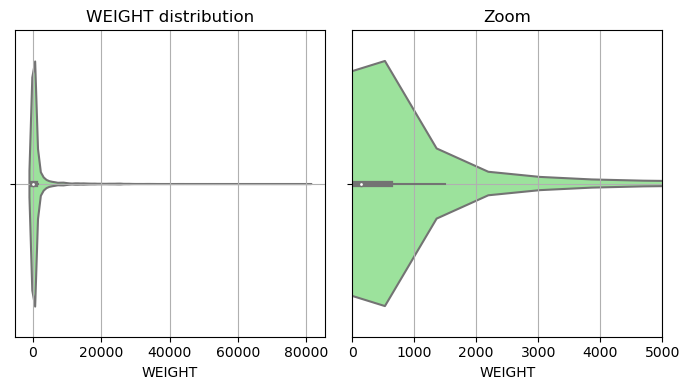

In [47]:
# Plotting histogram
plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
sns.violinplot(x=df_clean['WEIGHT'], color='lightgreen')
plt.title('WEIGHT distribution')
plt.xlabel('WEIGHT')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.violinplot(x=df_clean['WEIGHT'], color='lightgreen')
plt.title('Zoom')
plt.xlabel('WEIGHT')
plt.xlim(0, 5000) 
plt.grid(True)

plt.tight_layout()
plt.show()

In [48]:
median = df_clean['WEIGHT'].median()
mode = df_clean['WEIGHT'].mode().iloc[0] 
print(f"WEIGHT median is: {median}")
print(f"WEIGHT mode is: {mode}")

WEIGHT median is: 136.0
WEIGHT mode is: 1.0


## CHARGEABLE_WEIGHT

Plotting Chargeable Weight distribution:

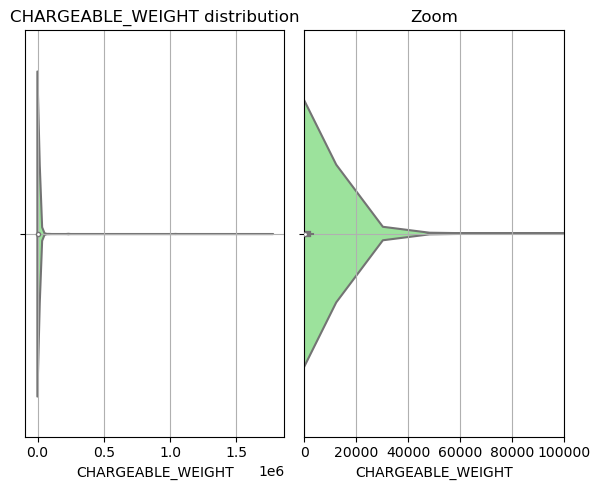

In [49]:
# Plotting histogram
plt.figure(figsize=(6, 5))

plt.subplot(1, 2, 1)
sns.violinplot(x=df_clean['CHARGEABLE_WEIGHT'], color='lightgreen')
plt.title('CHARGEABLE_WEIGHT distribution')
plt.xlabel('CHARGEABLE_WEIGHT')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.violinplot(x=df_clean['CHARGEABLE_WEIGHT'], color='lightgreen')
plt.title('Zoom')
plt.xlabel('CHARGEABLE_WEIGHT')
plt.xlim(0, 100000) 
plt.grid(True)

plt.tight_layout()
plt.show()

In [50]:
median = df_clean['CHARGEABLE_WEIGHT'].median()
mode = df_clean['CHARGEABLE_WEIGHT'].mode().iloc[0] 
print(f"CHARGEABLE_WEIGHT median is: {median}")
print(f"CHARGEABLE_WEIGHT mode is: {mode}")

CHARGEABLE_WEIGHT median is: 396.27
CHARGEABLE_WEIGHT mode is: 740.0


## VOLUME

Plotting Volume distribution:

In [51]:
df_clean.loc[df_clean['VOLUME'] < 0, 'VOLUME'] = 0.0

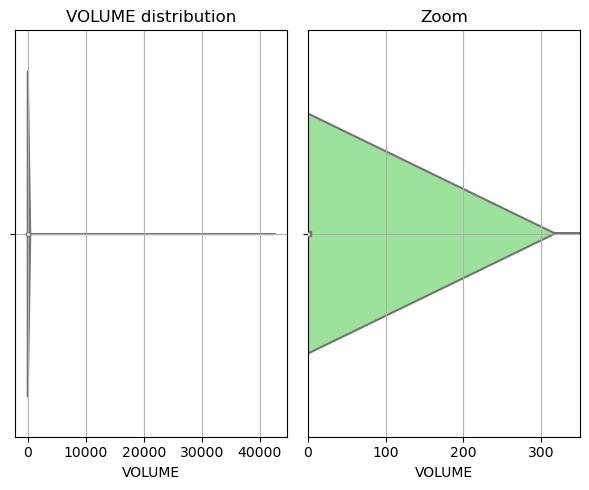

In [52]:
# Plotting histogram
plt.figure(figsize=(6, 5))

plt.subplot(1, 2, 1)
sns.violinplot(x=df_clean['VOLUME'], color='lightgreen')
plt.title('VOLUME distribution')
plt.xlabel('VOLUME')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.violinplot(x=df_clean['VOLUME'], color='lightgreen')
plt.title('Zoom')
plt.xlabel('VOLUME')
plt.xlim(0, 350) 
plt.grid(True)

plt.tight_layout()
plt.show()

In [53]:
median = df_clean['VOLUME'].median()
mode = df_clean['VOLUME'].mode().iloc[0] 
print(f"VOLUME median is: {median}")
print(f"VOLUME mode is: {mode}")

VOLUME median is: 0.36
VOLUME mode is: 0.01


## PIECES

Plotting Pieces distribution:

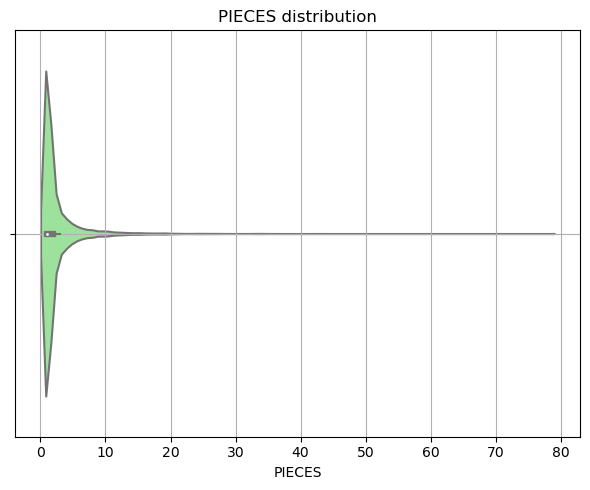

In [54]:
plt.figure(figsize=(6, 5))
sns.violinplot(x=df_clean['PIECES'], color='lightgreen')
plt.title('PIECES distribution')
plt.xlabel('PIECES')
plt.grid(True)

plt.tight_layout()
plt.show()

In [55]:
median = df_clean['PIECES'].median()
mode = df_clean['PIECES'].mode().iloc[0] 
print(f"PIECES median is: {median}")
print(f"PIECES mode is: {mode}")

PIECES median is: 1.0
PIECES mode is: 1


## IN_OUT_TFR

In [56]:
print(df_clean['IN_OUT_TFR'].describe())

count       13049
unique          3
top       INBOUND
freq        10701
Name: IN_OUT_TFR, dtype: object


In [57]:
df_clean['IN_OUT_TFR'].value_counts()

INBOUND     10701
OUTBOUND     1771
TRANSFER      577
Name: IN_OUT_TFR, dtype: int64

**Inbound movements** are the most frequent in these shipments. 

## DANGEROUS_GOODS

In [58]:
df_clean.loc[df_clean['DANGEROUS_GOODS'] == "" , 'DANGEROUS_GOODS'] = 'N'
df_clean.loc[df_clean['DANGEROUS_GOODS'] == "0", 'DANGEROUS_GOODS' ] = 'N'

In [59]:
print(df_clean['DANGEROUS_GOODS'].describe())

count     13049
unique        2
top           N
freq      13040
Name: DANGEROUS_GOODS, dtype: object


In [60]:
df_clean['DANGEROUS_GOODS'].value_counts()

N    13040
Y        9
Name: DANGEROUS_GOODS, dtype: int64

## Store data

In [61]:
output_path = my_path + "Clean_Data.xlsx"
df_clean.to_excel(output_path, sheet_name='Data', index=False)